<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Exploration + Data Pre-Processing
</h1>

In [252]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Getting to know the Data 

In [253]:
data = pd.read_csv('FlightsDB.csv', parse_dates=['Snapshot Time', 'Departure Date', 'Return Date'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  object        
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  object        
 7   Return Departure Time              540000 non-null  object        
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  object        
 10  Onward Departure Air

In [254]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')

In [255]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 540000, Columns: 29


In [256]:
print(data.isnull().sum())

Origin                                    0
Destination                               0
TTT                                       0
LOS                                       0
Departure Time                            0
Departure Date                            0
Arrival Time                              0
Return Departure Time                     0
Return Date                               0
Return Arrival Time                       0
Onward Departure Airport                  0
Onward Arrival Airport                    0
Return Departure Airport                  0
Return Arrival Airport                    0
Onward Airlines                           0
Return Airlines                           0
Onward Flight Connections                 0
Onward Connection Duration(min)           0
Onward Flight Connection Airport     537245
Return Flight Connections                 0
Return Connection Duration(min)           0
Return Flight Connection Airport     537128
Carry-ons                       

### Missing Values in Connection-Related Fields

Most of the flights in this dataset are direct flights, which explains why the majority of the **NULL** values appear in fields related to flight connections. Fields such as **`Onward Flight Connection Airport`** and **`Return Flight Connection Airport`** contain a significant number of missing values because they are only relevant for flights with layovers. For direct flights, these fields remain empty by default.
_____________

In [257]:
data.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,688,2025-03-06,Kayak,150,170
1,London,Rome,1,1,9:10,2025-03-07,12:40,6:35,2025-03-08,8:25,...,0,0,NaN,0,0,726,2025-03-06,Kayak,150,170
2,London,Rome,1,1,9:20,2025-03-07,12:50,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,752,2025-03-06,Kayak,150,170
3,London,Rome,1,1,9:05,2025-03-07,12:35,11:05,2025-03-08,12:50,...,0,0,NaN,0,0,782,2025-03-06,Kayak,150,165
4,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,771,2025-03-06,Kayak,150,170


In [258]:
# Display summary statistics to understand the distribution of numerical data
data.describe()

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,540000.000000,540000.000000,540000,540000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000,540000.000000,540000.000000
mean,15.500000,3.000000,2025-03-23 20:00:00.000000512,2025-03-26 19:59:59.999999744,0.005148,0.911606,0.005393,1.040463,0.114917,0.007333,609.968856,2025-03-08 08:00:00,121.390337,121.632189
min,1.000000,1.000000,2025-03-07 00:00:00,2025-03-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,2025-03-06 00:00:00,60.000000,60.000000
25%,8.000000,2.000000,2025-03-16 00:00:00,2025-03-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,2025-03-06 00:00:00,80.000000,80.000000
50%,15.500000,3.000000,2025-03-24 00:00:00,2025-03-27 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,592.000000,2025-03-09 00:00:00,130.000000,130.000000
75%,23.000000,4.000000,2025-03-31 00:00:00,2025-04-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,740.000000,2025-03-10 00:00:00,150.000000,150.000000
max,30.000000,5.000000,2025-04-09 00:00:00,2025-04-14 00:00:00,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,2810.000000,2025-03-10 00:00:00,2460.000000,2530.000000
std,8.655449,1.414215,NaN,NaN,0.072210,21.541368,0.074241,23.917243,0.318922,0.090359,235.259242,NaN,44.691912,46.554233


In [259]:
data.describe().round(2)

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,540000.00,540000.00,540000,540000,540000.00,540000.00,540000.00,540000.00,540000.00,540000.00,540000.00,540000,540000.00,540000.00
mean,15.50,3.00,2025-03-23 20:00:00.000000512,2025-03-26 19:59:59.999999744,0.01,0.91,0.01,1.04,0.11,0.01,609.97,2025-03-08 08:00:00,121.39,121.63
min,1.00,1.00,2025-03-07 00:00:00,2025-03-08 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,168.00,2025-03-06 00:00:00,60.00,60.00
25%,8.00,2.00,2025-03-16 00:00:00,2025-03-19 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,438.00,2025-03-06 00:00:00,80.00,80.00
50%,15.50,3.00,2025-03-24 00:00:00,2025-03-27 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,592.00,2025-03-09 00:00:00,130.00,130.00
75%,23.00,4.00,2025-03-31 00:00:00,2025-04-03 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,740.00,2025-03-10 00:00:00,150.00,150.00
max,30.00,5.00,2025-04-09 00:00:00,2025-04-14 00:00:00,2.00,1560.00,2.00,1785.00,1.00,2.00,2810.00,2025-03-10 00:00:00,2460.00,2530.00
std,8.66,1.41,NaN,NaN,0.07,21.54,0.07,23.92,0.32,0.09,235.26,NaN,44.69,46.55


# **Data Preparation**
__________________________________________________________________________


In [260]:
data.rename(columns={'Snapshot Time': 'Snapshot Date'}, inplace=True)

In [261]:
# Creating a copy of the dataset to apply modifications without altering the original scraped data
data_copy = data.copy()

#### Converting Dates and Times and Calculating Additional Fields Based on Date and Time Values


In [262]:
for col in ['Arrival Time', 'Return Arrival Time']:
    problematic_values = data_copy[~data_copy[col].str.match(r'^\d{1,2}:\d{2}$', na=False)][col].unique()
    print(f"Problematic values in {col}: {problematic_values}")


Problematic values in Arrival Time: ['00:10+1' '00:35+1' '00:30+1' '06:45+1' '11:00+1' '23:15+1' '10:05+1'
 '14:20+1' '08:00+1' '07:55+1' '03:10+1' '01:30+1' '00:50+1' '08:20+1'
 '00:55+1' '00:20+1' '00:15+1' '00:25+1' '09:45+1' '07:50+1' '07:25+1'
 '05:25+1' '12:15+1' '22:00+1' '18:25+1' '06:10+1' '05:00+1' '09:30+1'
 '08:15+1' '10:55+1' '11:55+1' '12:05+1' '06:30+1' '09:00+1' '02:15+1'
 '07:10+1' '09:35+1' '11:50+1' '07:00+1' '07:15+1' '00:20+2' '18:35+1'
 '09:05+1' '08:35+1' '22:15+1' '13:50+1' '01:10+1' '07:40+1' '23:35+1'
 '14:30+1' '09:20+1' '10:20+1' '20:50+1' '11:25+1' '15:05+1']
Problematic values in Return Arrival Time: ['10:55+1' '05:25+1' '07:25+1' '08:15+1' '12:05+1' '03:10+1' '00:30+1'
 '00:10+1' '08:00+1' '06:10+1' '07:50+1' '05:00+1' '05:55+1' '20:55+1'
 '18:20+1' '22:50+1' '09:30+1' '06:55+1' '09:00+1' '07:00+1' '07:10+1'
 '11:00+1' '00:55+1' '10:05+1' '00:35+1' '14:20+1' '20:35+1' '21:25+1'
 '18:25+1' '07:55+1' '01:30+1' '22:00+1' '00:20+1' '08:20+1' '13:50+1'
 '00:15

In [263]:
data_copy['Arrival Time'][78]

'00:10+1'

In [264]:
for time_col, date_col in zip(['Arrival Time', 'Return Arrival Time'], ['Departure Date', 'Return Date']):
    # Extract extra days (e.g., +1, +2) from time values
    extra_days = data_copy[time_col].str.extract(r'(\d{1,2}):(\d{2})\+?(\d*)$')[2]
    extra_days = pd.to_numeric(extra_days, errors="coerce").fillna(0).astype(int)
    clean_times = data_copy[time_col].str.extract(r'(\d{1,2}:\d{2})')[0]  # Extract the time without `+1`
    
    # Create datetime by combining the correct date with the extracted time
    data_copy[time_col] = pd.to_datetime(data_copy[date_col].astype(str) + " " + clean_times, format="%Y-%m-%d %H:%M", errors='coerce')

    # Add the extra days to adjust the datetime values
    data_copy[time_col] = data_copy[time_col] + pd.to_timedelta(extra_days, unit="D")

### Fixing Time Format and Adjusting for Extra Days

The arrival time columns contained values in the format `"HH:MM+X"`, where `+X` indicates the number of days added to the time. This caused issues in processing, as the times were not in a standard format.

To fix this:
1. **Extract extra days** (`+1`, `+2`, etc.) and convert them into integers.
2. **Extract only the time** (`HH:MM`) and discard the extra day notation.
3. **Merge the extracted time with the corresponding date** (`Departure Date` or `Return Date`).
4. **Convert the result into a proper `datetime` format**.
5. **Add the extra days to the final `datetime` value** to correctly reflect the actual arrival time.

This ensures that all arrival times are in a valid format, allowing for further analysis and time-based calculations.


In [265]:
data_copy['Arrival Time'][78]

Timestamp('2025-03-08 00:10:00')

In [266]:
print(data_copy[['Departure Date', 'Arrival Time']].head())  
print(data_copy[['Return Date', 'Return Arrival Time']].head())  

  Departure Date        Arrival Time
0     2025-03-07 2025-03-07 12:40:00
1     2025-03-07 2025-03-07 12:40:00
2     2025-03-07 2025-03-07 12:50:00
3     2025-03-07 2025-03-07 12:35:00
4     2025-03-07 2025-03-07 12:40:00
  Return Date Return Arrival Time
0  2025-03-08 2025-03-08 08:35:00
1  2025-03-08 2025-03-08 08:25:00
2  2025-03-08 2025-03-08 08:35:00
3  2025-03-08 2025-03-08 12:50:00
4  2025-03-08 2025-03-08 08:35:00


In [267]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  object        
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  datetime64[ns]
 7   Return Departure Time              540000 non-null  object        
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  datetime64[ns]
 10  Onward Departure Air

In [268]:
data_copy['Departure Time'][0]

'9:10'

In [269]:
for time_col, date_col in zip(['Departure Time', 'Return Departure Time'], 
                              ['Departure Date', 'Return Date']):
    # Convert time column to timedelta (hours and minutes)
    time_as_timedelta = pd.to_timedelta(data_copy[time_col].astype(str) + ':00', errors='coerce')  

    # Combine date with time
    data_copy[time_col] = data_copy[date_col] + time_as_timedelta

    # Ensure the column is stored as datetime64
    data_copy[time_col] = pd.to_datetime(data_copy[time_col], errors='coerce')


In [270]:
data_copy['Departure Time'][0]

Timestamp('2025-03-07 09:10:00')

In [271]:
print(data_copy.dtypes)

Origin                                       object
Destination                                  object
TTT                                           int64
LOS                                           int64
Departure Time                       datetime64[ns]
Departure Date                       datetime64[ns]
Arrival Time                         datetime64[ns]
Return Departure Time                datetime64[ns]
Return Date                          datetime64[ns]
Return Arrival Time                  datetime64[ns]
Onward Departure Airport                     object
Onward Arrival Airport                       object
Return Departure Airport                     object
Return Arrival Airport                       object
Onward Airlines                              object
Return Airlines                              object
Onward Flight Connections                     int64
Onward Connection Duration(min)               int64
Onward Flight Connection Airport             object
Return Fligh

In [272]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  datetime64[ns]
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  datetime64[ns]
 7   Return Departure Time              540000 non-null  datetime64[ns]
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  datetime64[ns]
 10  Onward Departure Air

In [273]:
# Extract time features with dt.
data_copy['Departure Month'] = data_copy['Departure Time'].dt.month
data_copy['Departure Day'] = data_copy['Departure Time'].dt.day
data_copy['Departure Hour'] = data_copy['Departure Time'].dt.hour
data_copy['Departure Weekday'] = (data_copy['Departure Time'].dt.weekday + 1) % 7  # Sunday=0, Saturday=6

data_copy['Return Month'] = data_copy['Return Departure Time'].dt.month
data_copy['Return Day'] = data_copy['Return Departure Time'].dt.day
data_copy['Return Hour'] = data_copy['Return Departure Time'].dt.hour
data_copy['Return Weekday'] = (data_copy['Return Departure Time'].dt.weekday + 1) % 7  # Sunday=0, Saturday=6

In [274]:
print(data_copy[['Departure Month', 'Departure Day', 'Departure Hour', 'Departure Weekday']].head())
print(data_copy[['Return Month', 'Return Day', 'Return Hour', 'Return Weekday']].head())

   Departure Month  Departure Day  Departure Hour  Departure Weekday
0                3              7               9                  5
1                3              7               9                  5
2                3              7               9                  5
3                3              7               9                  5
4                3              7               9                  5
   Return Month  Return Day  Return Hour  Return Weekday
0             3           8            6               6
1             3           8            6               6
2             3           8            6               6
3             3           8           11               6
4             3           8            6               6


In [275]:
# Function to categorize hours
def categorize_hour(hour):
    if pd.isna(hour):  # Preserve missing values
        return None
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

In [276]:
data_copy['Departure Time Category'] = data_copy['Departure Hour'].apply(categorize_hour)
data_copy['Return Time Category'] = data_copy['Return Hour'].apply(categorize_hour)

# Convert time categories to numeric values
time_category_mapping = {
    'Night': 0,      # 00:00 - 05:59
    'Morning': 1,    # 06:00 - 11:59
    'Afternoon': 2,  # 12:00 - 17:59
    'Evening': 3     # 18:00 - 23:59
}

data_copy['Departure Time Category Num'] = data_copy['Departure Time Category'].map(time_category_mapping)
data_copy['Return Time Category Num'] = data_copy['Return Time Category'].map(time_category_mapping)


**בעייתי עבור רגרסיה**

In [277]:
# Remove old columns that are no longer needed (keeping only DateTime columns)
data_copy.drop(columns=[
    'Departure Date', 'Departure Time', 'Return Date', 'Return Departure Time', 
    'Departure Hour', 'Return Hour', 'Departure Time Category', 'Return Time Category'
], inplace=True)

In [278]:
print("Time category mapping:")
print(time_category_mapping)

Time category mapping:
{'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}


In [279]:
display(data_copy[['Departure Month', 'Departure Day', 'Departure Time Category Num', 'Departure Weekday']].head(10))
display(data_copy[['Return Month', 'Return Day', 'Return Time Category Num', 'Return Weekday']].head(10))

,Departure Month,Departure Day,Departure Time Category Num,Departure Weekday
0,3,7,1,5
1,3,7,1,5
2,3,7,1,5
3,3,7,1,5
4,3,7,1,5
5,3,7,1,5
6,3,7,1,5
7,3,7,1,5
8,3,7,1,5
9,3,7,1,5


,Return Month,Return Day,Return Time Category Num,Return Weekday
0,3,8,1,6
1,3,8,1,6
2,3,8,1,6
3,3,8,1,6
4,3,8,1,6
5,3,8,1,6
6,3,8,1,6
7,3,8,3,6
8,3,8,1,6
9,3,8,1,6


In [280]:
print("Value counts per time category:")
print(data_copy['Departure Time Category Num'].value_counts(dropna=False))
print(data_copy['Return Time Category Num'].value_counts(dropna=False))

Value counts per time category:
Departure Time Category Num
1    230636
2    182223
3    125242
0      1899
Name: count, dtype: int64
Return Time Category Num
1    230704
2    176203
3    131102
0      1991
Name: count, dtype: int64


In [281]:
# Display 5 random rows
display(data_copy.sample(5))

,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Total Onward Flight Duration(min),Total Return Flight Duration(min),Departure Month,Departure Day,Departure Weekday,Return Month,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num
421868,Rome,London,2,5,2025-03-12 08:20:00,2025-03-17 12:50:00,FCO,LGW,LGW,FCO,...,165,150,3,12,3,3,17,1,1,1
194481,Rome,London,8,2,2025-03-17 11:50:00,2025-03-19 12:50:00,CIA,STN,LGW,FCO,...,165,150,3,17,1,3,19,3,1,1
139701,Paris,Rome,20,4,2025-03-26 19:40:00,2025-03-30 11:45:00,ORY,FCO,FCO,ORY,...,120,125,3,26,3,3,30,0,2,1
133775,Paris,London,14,4,2025-03-20 10:15:00,2025-03-24 20:55:00,CDG,LGW,LTN,CDG,...,70,80,3,20,4,3,24,1,1,3
68904,Rome,Paris,9,5,2025-03-15 22:25:00,2025-03-20 09:40:00,FCO,ORY,ORY,FCO,...,135,120,3,15,6,3,20,4,3,1


כנל בעייתי עבור רגרסיה

In [282]:
# Mapping weekdays: False = Not Weekend (Monday-Thursday), True = Weekend (Friday-Sunday)
weekend_mapping = {0: False, 1: False, 2: False, 3: False,  # Monday-Thursday = False (Not Weekend)
                   4: True, 5: True, 6: True}        # Friday-Sunday = True (Weekend)

# Create the new column based on the mapping
data_copy['Is Weekend Flight'] = data_copy['Departure Weekday'].map(weekend_mapping)
print(data_copy[['Departure Weekday', 'Is Weekend Flight']].head())


   Departure Weekday  Is Weekend Flight
0                  5               True
1                  5               True
2                  5               True
3                  5               True
4                  5               True


In [283]:
# Count the number of midweek and weekend flights
weekend_flight_counts = data_copy['Is Weekend Flight'].value_counts()

# Print the results in a readable format
print(f"Midweek flights: {weekend_flight_counts.get(0, 0)}")
print(f"Weekend flights: {weekend_flight_counts.get(1, 0)}")

Midweek flights: 312000
Weekend flights: 228000


### Handling the 'Site' Column


In [284]:
# Check unique values in the 'Site' column before mapping
print(data_copy['Site'].unique())

['Kayak' 'Momondo']


### Adding Airport Distance from City Center


In [285]:
# Step 1: Update the dictionary with airport information including SOU
airports_info = {
    'London': {
        'Heathrow': {'code': 'LHR', 'distance_from_city_center(km)': '23'},
        'Gatwick': {'code': 'LGW', 'distance_from_city_center(km)': '45'},
        'Stansted': {'code': 'STN', 'distance_from_city_center(km)': '64'},
        'Luton': {'code': 'LTN', 'distance_from_city_center(km)': '56'},
        'City': {'code': 'LCY', 'distance_from_city_center(km)': '11'},
        'Southend': {'code': 'SEN', 'distance_from_city_center(km)': '64'},
        'Southampton': {'code': 'SOU', 'distance_from_city_center(km)': '110'},  
    },
    'Rome': {
        'Fiumicino': {'code': 'FCO', 'distance_from_city_center(km)': '32'},
        'Ciampino': {'code': 'CIA', 'distance_from_city_center(km)': '15'},
    },
    'Paris': {
        'Charles de Gaulle': {'code': 'CDG', 'distance_from_city_center(km)': '25'},
        'Orly': {'code': 'ORY', 'distance_from_city_center(km)': '13'},
        'Beauvais-Tille': {'code': 'BVA', 'distance_from_city_center(km)': '85'},
    }
}


In [286]:
# Step 2: Create a dictionary to translate from airport code to distance from city center
airport_distances = {}

for city, airports in airports_info.items():
    for airport_name, details in airports.items():
        if 'distance_from_city_center(km)' in details:
            if 'code' in details:
                airport_code = details['code'].upper()  # Convert code to uppercase
                airport_distances[airport_code] = float(details['distance_from_city_center(km)'])  # Convert to float


In [287]:
# Step 3: Function to get the distance by airport code
def get_airport_distance(airport):
    if pd.isna(airport):  # If the value is missing, return None
        return None
    return airport_distances.get(airport.upper(), None)  # Compare by code in uppercase


In [288]:
# Step 4: Add the distances for each airport in the table
data_copy['Onward Departure Airport Distance'] = data_copy['Onward Departure Airport'].apply(get_airport_distance)
data_copy['Onward Arrival Airport Distance'] = data_copy['Onward Arrival Airport'].apply(get_airport_distance)
data_copy['Return Departure Airport Distance'] = data_copy['Return Departure Airport'].apply(get_airport_distance)
data_copy['Return Arrival Airport Distance'] = data_copy['Return Arrival Airport'].apply(get_airport_distance)


In [289]:
display(data_copy[['Onward Departure Airport', 'Onward Departure Airport Distance',
                 'Onward Arrival Airport', 'Onward Arrival Airport Distance',
                 'Return Departure Airport', 'Return Departure Airport Distance',
                 'Return Arrival Airport', 'Return Arrival Airport Distance']].sample(10))

,Onward Departure Airport,Onward Departure Airport Distance,Onward Arrival Airport,Onward Arrival Airport Distance,Return Departure Airport,Return Departure Airport Distance,Return Arrival Airport,Return Arrival Airport Distance
369363,LTN,56.0,CDG,25.0,CDG,25.0,LTN,56.0
459702,STN,64.0,CIA,15.0,CIA,15.0,STN,64.0
58247,CDG,25.0,LGW,45.0,LHR,23.0,ORY,13.0
212614,CDG,25.0,LTN,56.0,LTN,56.0,CDG,25.0
154488,FCO,32.0,LGW,45.0,LGW,45.0,FCO,32.0
230609,FCO,32.0,LGW,45.0,STN,64.0,CIA,15.0
128743,ORY,13.0,FCO,32.0,FCO,32.0,BVA,85.0
528948,LGW,45.0,CDG,25.0,CDG,25.0,LGW,45.0
38932,ORY,13.0,LGW,45.0,LGW,45.0,ORY,13.0
485748,CIA,15.0,STN,64.0,LGW,45.0,FCO,32.0


In [290]:
# Finding airport codes missing distance information
missing_airports = set()

# Check each airport column to see if it is missing distance information
for col in ['Onward Departure Airport', 'Onward Arrival Airport', 
            'Return Departure Airport', 'Return Arrival Airport']:
    missing_airports.update(data_copy[col][data_copy[col].notnull() & data_copy[f"{col} Distance"].isnull()])

print("missing distance information:")
print(missing_airports)

missing distance information:
{'LON', 'PAR', 'ROM'}


In [291]:
# General airport codes that represent cities rather than specific airports
general_airport_codes = {'LON', 'ROM', 'PAR'}

# Filter rows where city codes appear instead of specific airports
problematic_rows = data_copy[
    data_copy['Onward Departure Airport'].isin(general_airport_codes) |
    data_copy['Onward Arrival Airport'].isin(general_airport_codes) |
    data_copy['Return Departure Airport'].isin(general_airport_codes) |
    data_copy['Return Arrival Airport'].isin(general_airport_codes)
]

# Display the first 10 rows with this issue
print(problematic_rows[['Onward Departure Airport', 'Onward Arrival Airport',
                        'Return Departure Airport', 'Return Arrival Airport']].head(10))

     Onward Departure Airport Onward Arrival Airport Return Departure Airport  \
201                       LON                    PAR                      PAR   
1501                      LON                    PAR                      PAR   
1901                      LON                    PAR                      PAR   
2501                      LON                    PAR                      PAR   
3201                      LON                    PAR                      PAR   
4199                      LON                    PAR                      PAR   
4878                      LTN                    CDG                      PAR   
5674                      LTN                    CDG                      PAR   
6101                      LON                    PAR                      PAR   
6588                      LTN                    CDG                      PAR   

     Return Arrival Airport  
201                     LON  
1501                    LON  
1901              

____________
### Idea- Using Average Airport Distance

At first, we thought about handling these airport records by **assigning the average distance** of all airports in the same city. This was because the specific airport code was missing, and we only had the city code.


In [292]:
# # Handling flights with missing distance info

# # Define city-to-airports mapping
# city_airports = {
#     'LON': ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN'],
#     'ROM': ['FCO', 'CIA'],
#     'PAR': ['CDG', 'ORY', 'BVA']
# }

# # Compute average distances for each city
# city_avg_distances = {
#     city: data_copy.loc[data_copy['Onward Departure Airport'].isin(airports), 'Onward Departure Airport Distance'].mean()
#     for city, airports in city_airports.items()
# }

# # List of columns to update
# airport_columns = ['Onward Departure Airport', 'Onward Arrival Airport', 'Return Departure Airport', 'Return Arrival Airport']

# # Update distances directly
# for col in airport_columns:
#     distance_col = f"{col} Distance"
    
#     # Map city codes ('LON', 'ROM', 'PAR') to their average distances
#     data_copy[distance_col] = data_copy[distance_col].fillna(data_copy[col].map(city_avg_distances))

# # Check for remaining missing values
# missing_values = data_copy[[f"{col} Distance" for col in airport_columns]].isnull().sum()

# print("📌 Check after filling in the missing values:")
# print(missing_values)
# print("✅ The distances have been updated based on the city's average distances!")


In [293]:
problematic_rows['Onward Airlines'].value_counts()

Onward Airlines
Eurostar           368
FlixBus             95
Vueling             36
easyJet             22
British Airways     16
BlaBlaBus            6
Union Ivkoni         5
Name: count, dtype: int64

In [294]:
problematic_rows['Return Airlines'].value_counts()

Return Airlines
Eurostar           393
FlixBus             96
Vueling             28
easyJet             15
Union Ivkoni         6
British Airways      6
BlaBlaBus            4
Name: count, dtype: int64

______________
### Issue: Incorrect Airline Entries

During data validation, we found that some airport records contained **bus and train companies** instead of actual airlines. Examples include **Eurostar, FlixBus, and BlaBlaBus**.

- These companies **do not operate flights**, leading to incorrect data.
 **Solution:** - - We identified and removed records where these companies appeared in the `"Return Airlines"` or `"Onward Airlines"` fields.
This affected only **0.101%** of the dataset, ensuring minimal data loss while improving accuracy.


In [295]:
# Remove non-airlines:
strings_to_remove = ['Eurostar', 'FlixBus', 'Union Ivkoni', 'BlaBlaBus']

data_copy_test = data_copy[
    # Every row where at least one of the columns (Return Airlines or Onward Airlines) contains a bus company will be removed.
    ~data_copy['Return Airlines'].str.contains('|'.join(strings_to_remove), na=False) & 
    ~data_copy['Onward Airlines'].str.contains('|'.join(strings_to_remove), na=False)
]


In [296]:
# Display data reduction details
print(f"Original data size: {data_copy.shape[0]}")
print(f"Filtered data size: {data_copy_test.shape[0]}")
removed_percentage = (1 - (data_copy_test.shape[0] / data_copy.shape[0])) * 100
print(f"Percentage of removed rows: {removed_percentage:.3f}%")

Original data size: 540000
Filtered data size: 539452
Percentage of removed rows: 0.101%


In [297]:
data_copy = data_copy_test.copy()

In [298]:
# Finding airport codes missing distance information
missing_airports = set()

# Check each airport column to see if it is missing distance information
for col in ['Onward Departure Airport', 'Onward Arrival Airport', 
            'Return Departure Airport', 'Return Arrival Airport']:
    missing_airports.update(data_copy[col][data_copy[col].notnull() & data_copy[f"{col} Distance"].isnull()])

# Display the list of airports missing distance information
print("Airport codes with missing distance information:")
print(missing_airports)

# After applying a solution, we should verify that no problematic fields remain.

Airport codes with missing distance information:
set()


### Adding a Computed Field for Total Number of Connections


In [299]:
data_copy['Total Connections'] = data_copy['Onward Flight Connections'] + data_copy['Return Flight Connections']

In [300]:
data_copy.describe()

,TTT,LOS,Arrival Time,Return Arrival Time,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,...,Return Month,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections
count,539452.000000,539452.000000,539452,539452,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,...,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000
mean,15.498293,3.000006,2025-03-24 10:54:18.450612480,2025-03-27 10:54:38.037156352,0.005146,0.911438,0.005387,1.040825,0.114240,0.006816,...,3.344314,16.157851,3.008918,1.797708,1.808029,33.572774,33.207064,33.613222,33.233061,0.010533
min,1.000000,1.000000,2025-03-07 00:10:00,2025-03-08 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.000000
25%,8.000000,2.000000,2025-03-16 18:05:00,2025-03-19 20:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,8.000000,1.000000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,0.000000
50%,15.000000,3.000000,2025-03-24 11:50:00,2025-03-27 11:50:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,17.000000,3.000000,2.000000,2.000000,32.000000,32.000000,32.000000,32.000000,0.000000
75%,23.000000,4.000000,2025-03-31 21:15:00,2025-04-03 21:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,24.000000,5.000000,2.000000,2.000000,45.000000,45.000000,45.000000,45.000000,0.000000
max,30.000000,5.000000,2025-04-10 22:15:00,2025-04-15 00:55:00,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,...,4.000000,31.000000,6.000000,3.000000,3.000000,85.000000,85.000000,85.000000,85.000000,3.000000
std,8.655260,1.414252,NaN,NaN,0.072195,21.548484,0.074179,23.928201,0.318103,0.084457,...,0.475145,9.041508,2.003328,0.794989,0.804817,16.755008,16.301730,16.847694,16.478378,0.107121


### Adding a Total Flight Duration for all Onward and Return flights


In [301]:
data_copy['Total Flight Duration(min)'] = data_copy['Total Onward Flight Duration(min)'] + data_copy['Total Return Flight Duration(min)']

## Data Preparation Summary

- **Converted date and time columns** into proper `datetime` objects and extracted key time features (`Departure Month`, `Departure Day`, `Departure Hour`, `Departure Weekday`, `Return Month`, `Return Day`, `Return Hour`, `Return Weekday`).  
- **Mapped airport distances** from city centers based on airport codes.  
- **Identified and removed incorrect records** where airline names were actually bus or train companies (`Eurostar`, `FlixBus`, etc.).  
- **Classified flights** as midweek or weekend based on departure day.  
- **Created computed fields** for additional insights:  
  - `Total Onward Flight Duration (min)`  
  - `Total Return Flight Duration (min)`  
  - `Total Number of Connections`  
  - `Onward Connection Duration (min)`  
  - `Return Connection Duration (min)`  
  - `Departure Time Category Num` (categorizing flights by time of day)  
  - `Return Time Category Num` (categorizing return flights by time of day)  
- **Checked and mapped 'Site' values** to ensure consistency.  
- **Created a 'Total Duration' field** combining onward and return flight durations.  

The dataset is now structured and ready for analysis.
_______________________

## **Flight Price Outlier Analysis**
-------------------------------

Removed outliers in Price (NIS) using Tukey’s IQR method.
Visualized price distribution before and after removal.

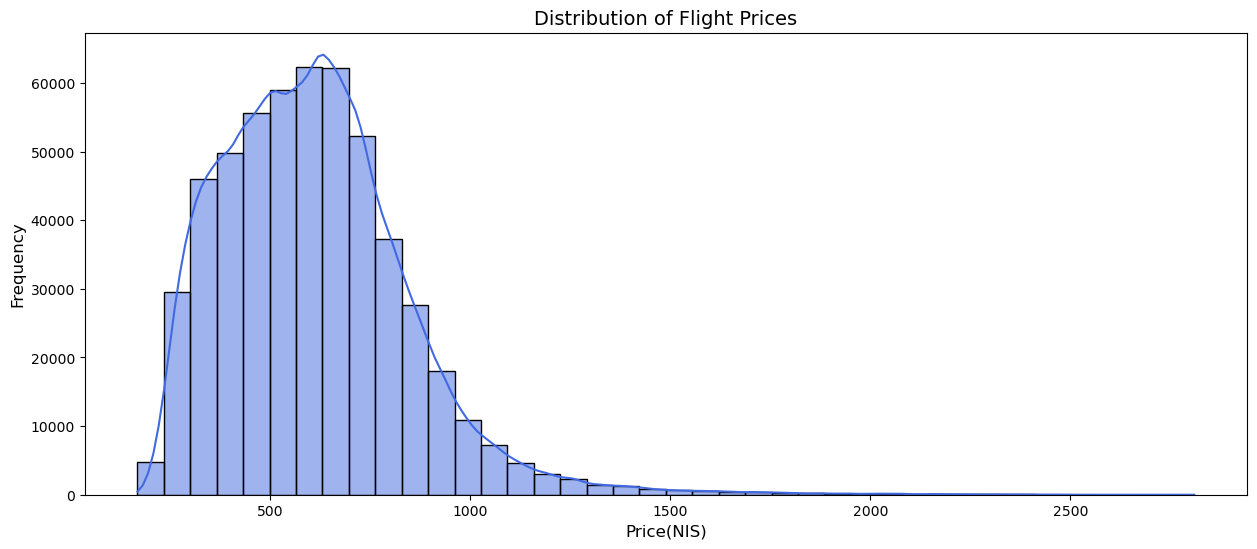

In [302]:
# Visualizing the distribution of flight prices to identify trends and outliers.

plt.figure(figsize=(15, 6))
sns.histplot(data_copy_test["Price(NIS)"], bins=40, kde=True, color="royalblue")
plt.title("Distribution of Flight Prices", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

### Flight Price Distribution – Outlier Analysis

- The price distribution is **right-skewed**, with most flights costing **300-800 NIS**.  
- A long tail extends beyond **1000 NIS**, with some flights exceeding **2000 NIS**.  
- These **high-price flights are potential outliers** and may need handling.  

In [303]:
def remove_outliers(route):
    # Calculate the first quartile (25th percentile) of the 'Price(NIS)' column
    Q1 = route["Price(NIS)"].quantile(0.25)
    
    # Calculate the third quartile (75th percentile) of the 'Price(NIS)' column
    Q3 = route["Price(NIS)"].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR), which is the difference between Q3 and Q1
    IQR = Q3 - Q1

    # Defining the lower and upper bounds for outliers using the IQR method
    lower_bound = Q1 - 1.5 * IQR  # Outlier threshold on the lower side
    upper_bound = Q3 + 1.5 * IQR  # Outlier threshold on the upper side

    # Return only rows where 'Price(NIS)' is between the lower and upper bounds (i.e., not an outlier)
    return route[(route["Price(NIS)"] >= lower_bound) & (route["Price(NIS)"] <= upper_bound)]


In [304]:
test_clean_data = data_copy.groupby(['Origin', 'Destination'], group_keys=False).apply(remove_outliers)

In [305]:
# Display data reduction details
print(f"Original data size: {data_copy.shape[0]}")
print(f"Filtered data size: {test_clean_data.shape[0]}")
removed_percentage = (1 - (test_clean_data.shape[0] / data_copy.shape[0])) * 100
print(f"Percentage of removed rows: {removed_percentage:.2f}%")

Original data size: 539452
Filtered data size: 527232
Percentage of removed rows: 2.27%


### Outlier Removal Summary  

- **2.27% of rows were removed** using the IQR method.  
- The dataset is now cleaner, with extreme flight prices filtered out.  
- This improves data quality and reduces price distortions.  
____________

In [306]:
data_copy = test_clean_data.copy()

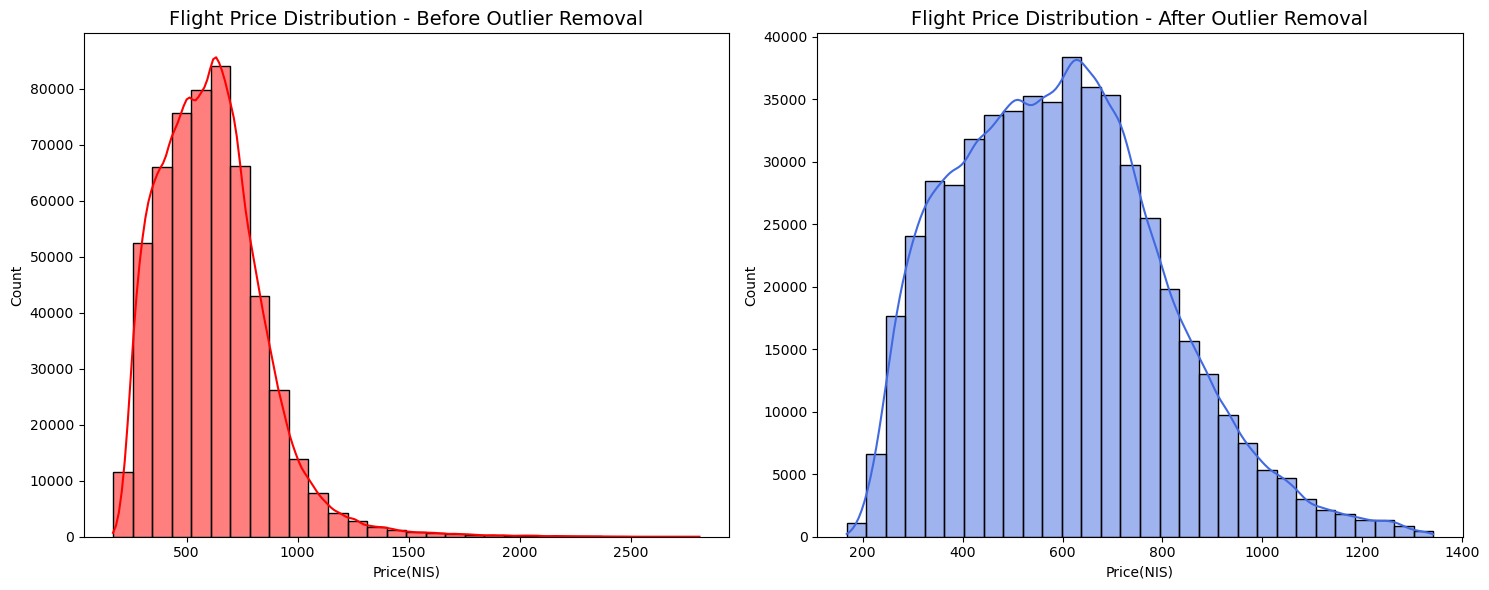

In [307]:
# Comparing flight price distribution before and after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data["Price(NIS)"], bins=30, kde=True, color="red", ax=axes[0])
axes[0].set_title("Flight Price Distribution - Before Outlier Removal", fontsize=14)

sns.histplot(data_copy["Price(NIS)"], bins=30, kde=True, color="royalblue", ax=axes[1])
axes[1].set_title("Flight Price Distribution - After Outlier Removal", fontsize=14)

plt.tight_layout()
plt.show()

# The histograms illustrate how removing outliers affects the price distribution, 
# making it more representative of typical flight prices.

_________
# **Visual Exploration of the Data**:   
### Understanding Key Patterns and Trends
__________________________________________________________________________


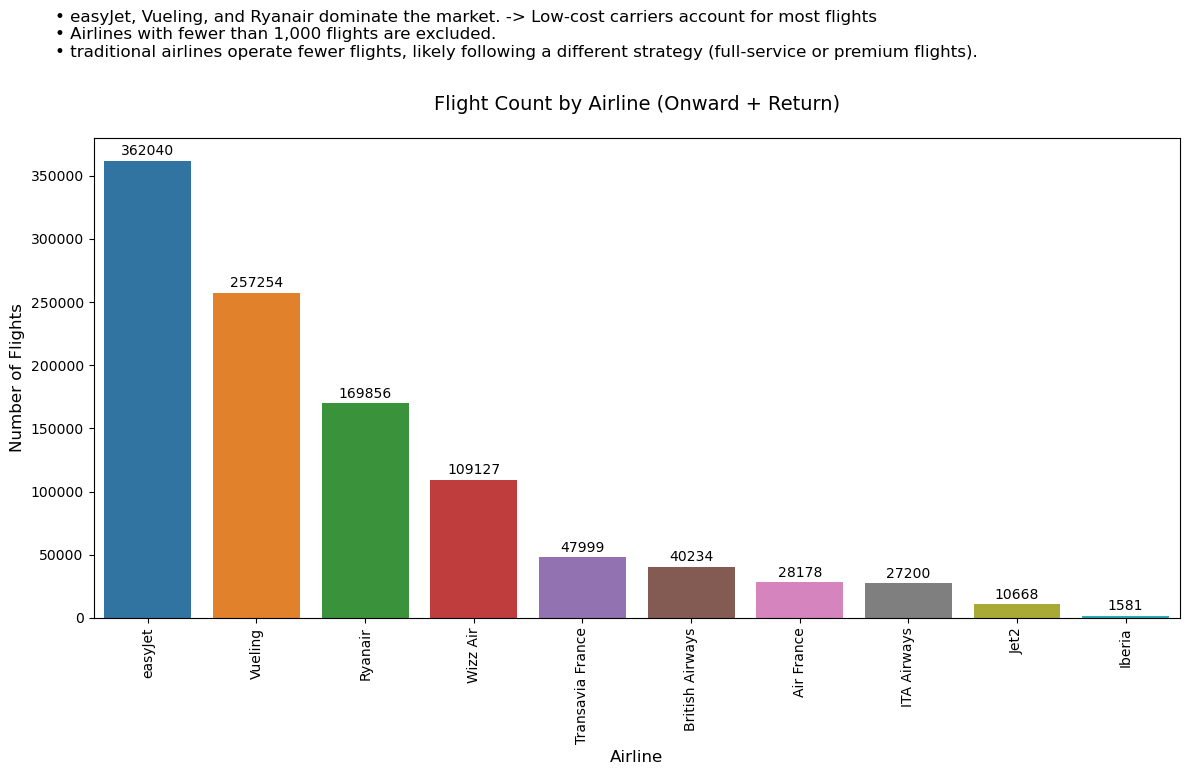

In [308]:
# Create a temporary DataFrame containing all airlines from both onward and return flights
airlines_df = pd.DataFrame({
    'Airline': pd.concat([data_copy['Onward Airlines'], data_copy['Return Airlines']], ignore_index=True)
})

# Count the number of flights for each airline
airline_counts = airlines_df['Airline'].value_counts()

# Filter airlines with at least 1,000 flights
min_flights = 1000
top_airlines = airline_counts[airline_counts > min_flights].index

# Keep only airlines that meet the threshold
filtered_data = airlines_df[airlines_df['Airline'].isin(top_airlines)]

# Create a bar chart - number of flights per airline
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(data=filtered_data, x="Airline", palette="tab10", order=top_airlines, ax=ax)

# Add flight counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 7), 
                textcoords='offset points',
                ha='center', va='center')

# Add conclusions above the title
conclusions = (
    "• easyJet, Vueling, and Ryanair dominate the market. -> Low-cost carriers account for most flights \n"
    "• Airlines with fewer than 1,000 flights are excluded.\n"
    "• traditional airlines operate fewer flights, likely following a different strategy (full-service or premium flights)."
)

# Adjusts the figure to make space for the text and places the text at the left side
plt.subplots_adjust(top=1.2)  # Adjusts the figure to make space for the text
plt.figtext(0.05, 1.1, conclusions, fontsize=12, ha='left', va='top')

# Customize titles and labels
plt.title("Flight Count by Airline (Onward + Return)", fontsize=14, pad=20)  # Slightly smaller padding for better spacing
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

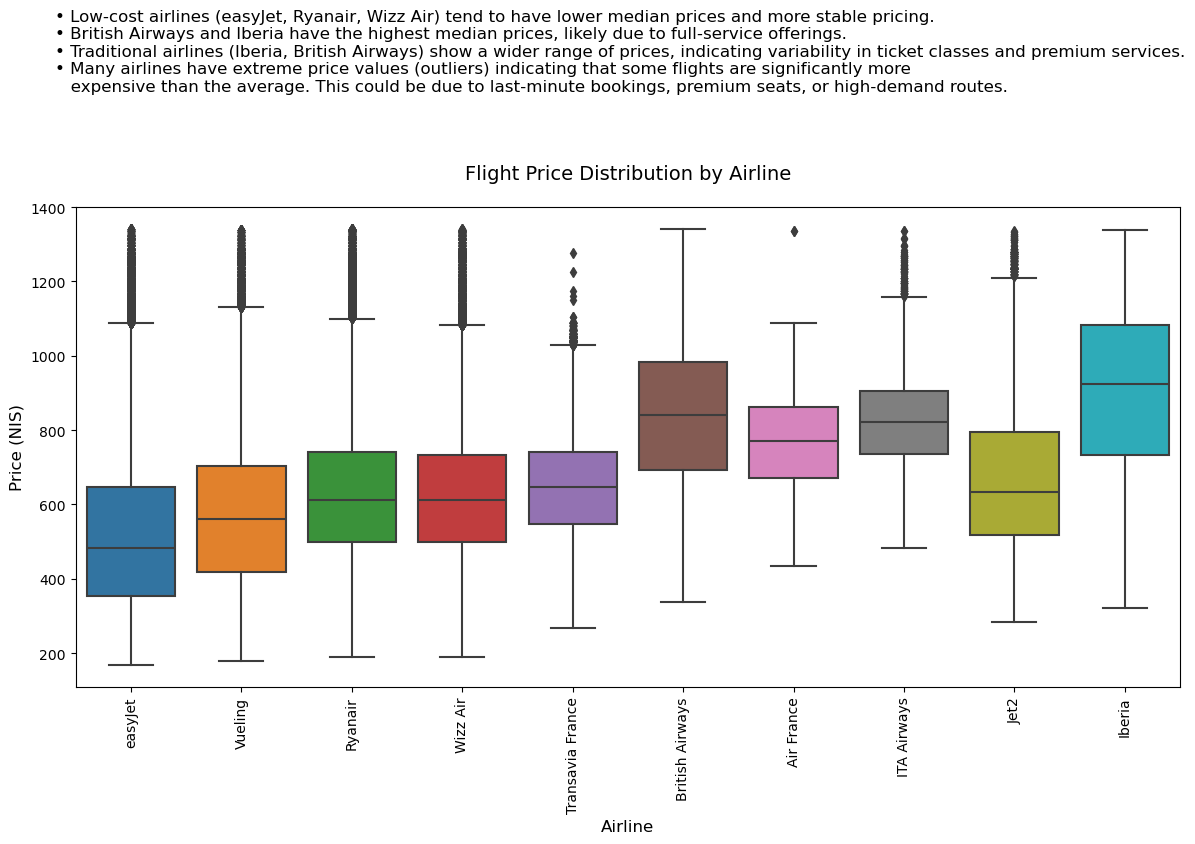

In [309]:
# Create a DataFrame with flight prices for both onward and return flights
price_df = pd.concat([
    data_copy[['Onward Airlines', 'Price(NIS)']],
    data_copy[['Return Airlines', 'Price(NIS)']].rename(columns={'Return Airlines': 'Onward Airlines'})
], ignore_index=True)

# Filter airlines with at least 1,000 flights
price_df = price_df[price_df['Onward Airlines'].isin(top_airlines)]

# Create a box plot to show flight price distribution by airline
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=price_df, x="Onward Airlines", y="Price(NIS)", palette="tab10", order=top_airlines, ax=ax)

# Customize titles and labels
plt.title("Flight Price Distribution by Airline", fontsize=14, pad=20)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.xticks(rotation=90)

conclusions = (
    "• Low-cost airlines (easyJet, Ryanair, Wizz Air) tend to have lower median prices and more stable pricing.\n"
    "• British Airways and Iberia have the highest median prices, likely due to full-service offerings.\n"
    "• Traditional airlines (Iberia, British Airways) show a wider range of prices, "
    "indicating variability in ticket classes and premium services.\n"
    "• Many airlines have extreme price values (outliers) indicating that some flights are significantly more \n"
    "   expensive than the average. This could be due to last-minute bookings, premium seats, or high-demand routes. \n"

)


# Adjust the figure to create space for the text
plt.subplots_adjust(top=1.2)
plt.figtext(0.05, 1.20, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()


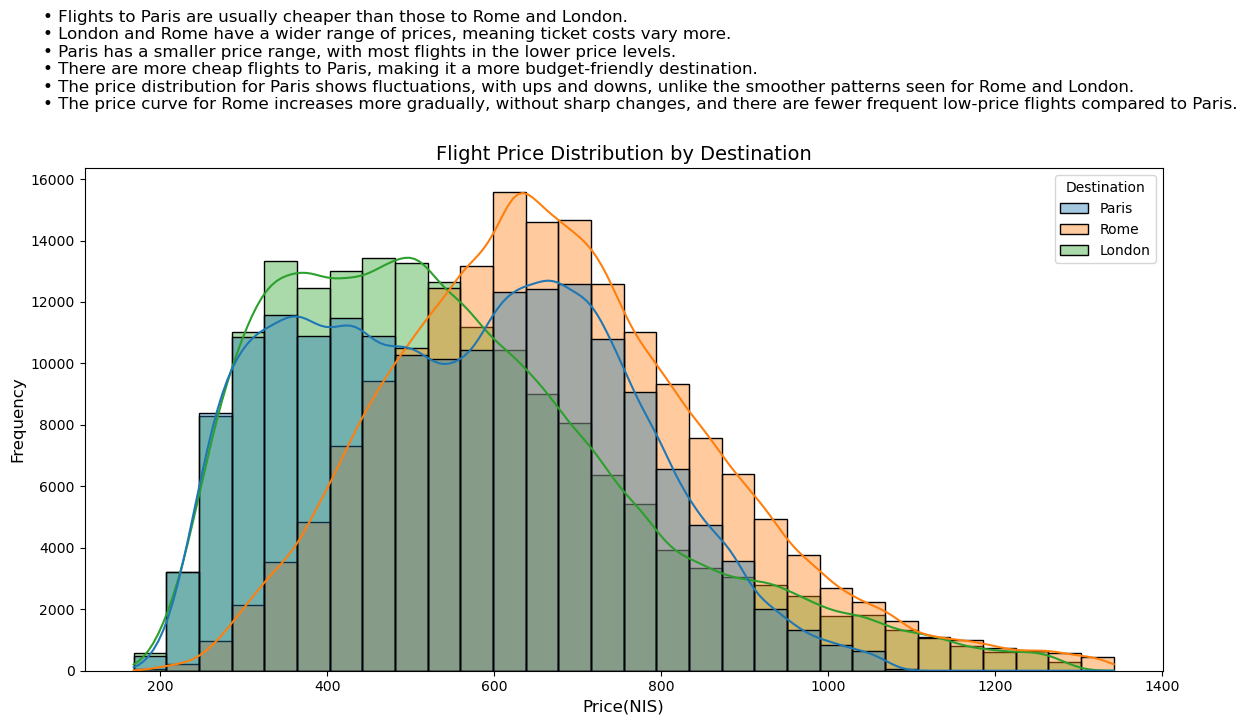

In [310]:
# 1. Create a histogram of flight prices by destination
plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Price(NIS)", hue="Destination", bins=30, kde=True, palette="tab10", alpha=0.4)

# 2. Set the title and labels for the histogram
plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 3. Add conclusions above the title
conclusions = (
    "• Flights to Paris are usually cheaper than those to Rome and London.\n"
    "• London and Rome have a wider range of prices, meaning ticket costs vary more.\n"
    "• Paris has a smaller price range, with most flights in the lower price levels.\n"
    "• There are more cheap flights to Paris, making it a more budget-friendly destination.\n"
    "• The price distribution for Paris shows fluctuations, with ups and downs, unlike the smoother patterns seen for Rome and London.\n"
    "• The price curve for Rome increases more gradually, without sharp changes, and there are fewer frequent low-price flights compared to Paris."
)

# Adjusts the figure to make space for the conclusions
plt.subplots_adjust(top=0.85)  # Adjusts the figure to make space for the text
plt.figtext(0.04, 1.20, conclusions, fontsize=12, ha='left', va='top')

# 4. Display the plot
plt.tight_layout()
plt.show()


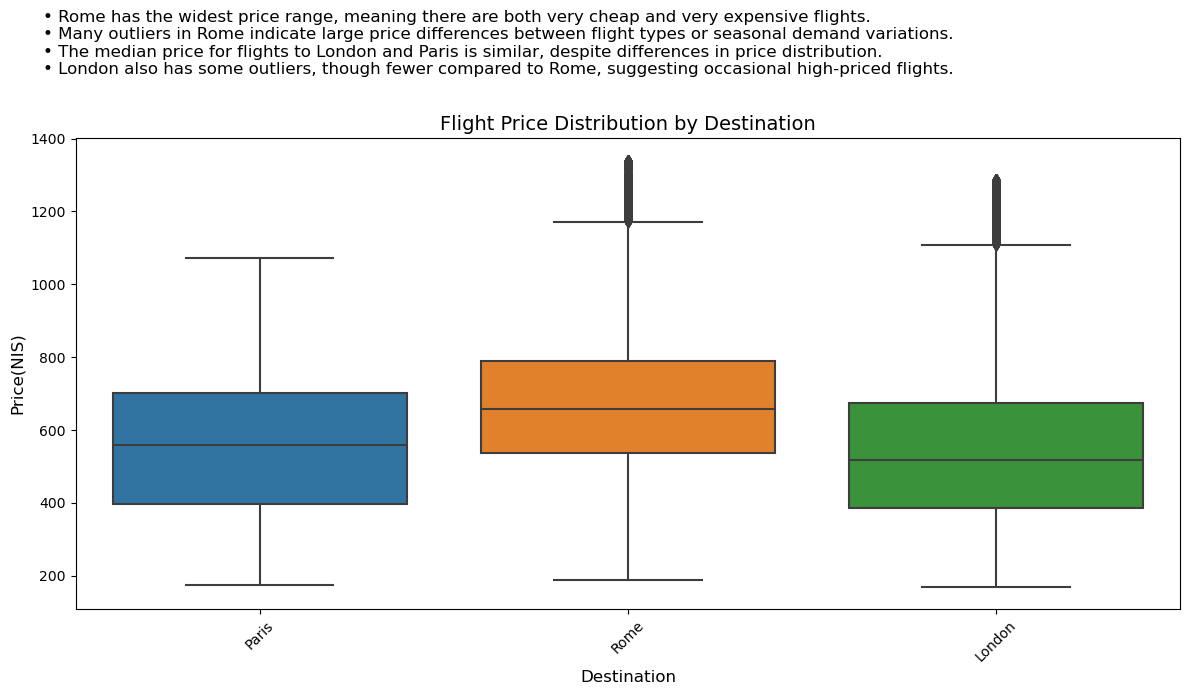

In [311]:
# Create the boxplot for flight prices by destination
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Destination", y="Price(NIS)", palette="tab10")

plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Price(NIS)", fontsize=12)

# Adding conclusions above the title
conclusions = (
    "• Rome has the widest price range, meaning there are both very cheap and very expensive flights.\n"
    "• Many outliers in Rome indicate large price differences between flight types or seasonal demand variations.\n"
    "• The median price for flights to London and Paris is similar, despite differences in price distribution.\n"
    "• London also has some outliers, though fewer compared to Rome, suggesting occasional high-priced flights."
)


# Adjust the figure to make space for the conclusions
plt.subplots_adjust(top=0.85)
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


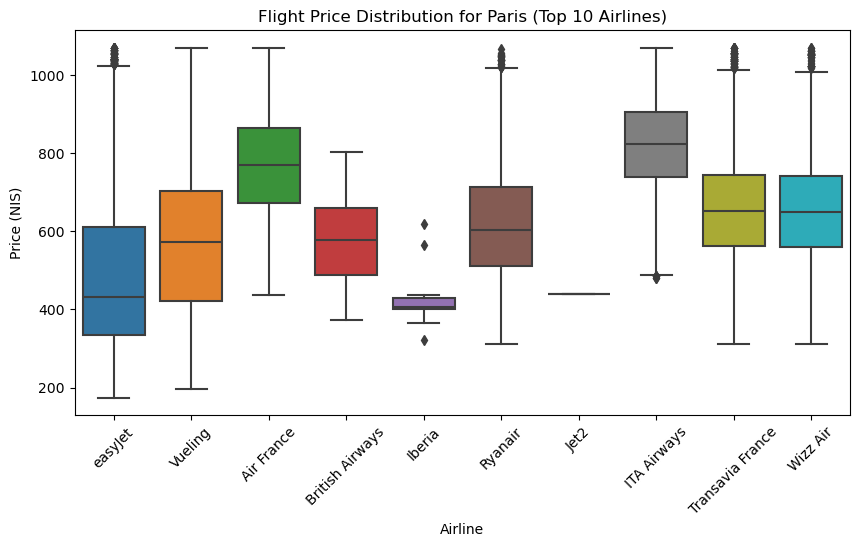

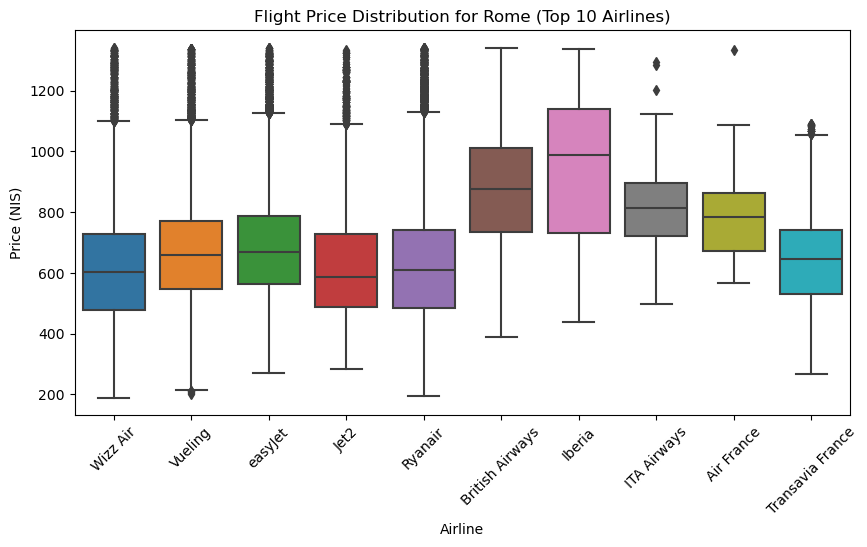

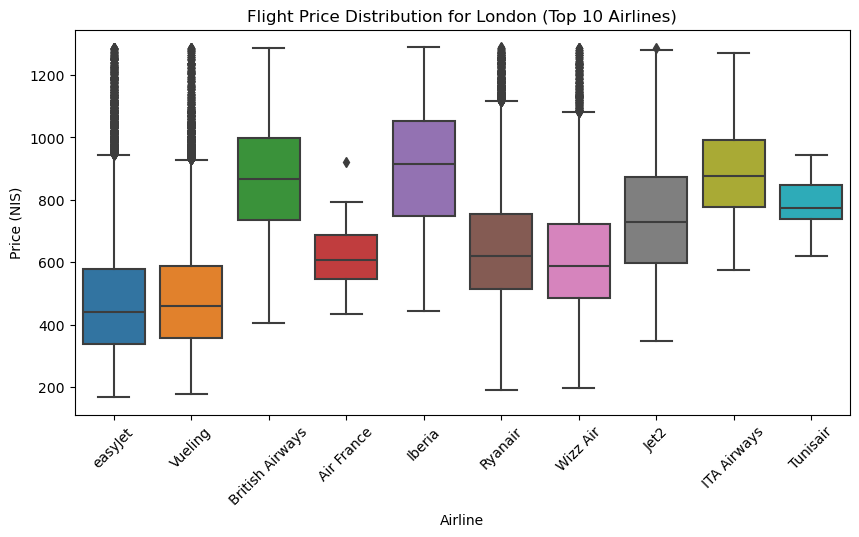

In [312]:
# Create a separate box plot for each destination showing the distribution of flight prices 
for destination in data_copy['Destination'].unique():
    plt.figure(figsize=(10, 5))
    subset = data_copy[data_copy['Destination'] == destination]
    
    # Select the top 10 airlines with the highest number of flights
    top_airlines = subset['Onward Airlines'].value_counts().nlargest(10).index
    subset = subset[subset['Onward Airlines'].isin(top_airlines)]
    
    # Generate a box plot for flight prices of the top 10 airlines for the given destination
    sns.boxplot(x='Onward Airlines', y='Price(NIS)', data=subset)
    plt.xticks(rotation=45)
    plt.title(f'Flight Price Distribution for {destination} (Top 10 Airlines)')
    plt.xlabel('Airline')
    plt.ylabel('Price (NIS)')
    plt.show()

In [313]:
print(data_copy[(data_copy['Destination'] == 'Paris') & (data_copy['Onward Airlines'] == 'Jet2')]['Price(NIS)'].describe())
# Jet2 has only one recorded flight to Paris.


count      1.0
mean     440.0
std        NaN
min      440.0
25%      440.0
50%      440.0
75%      440.0
max      440.0
Name: Price(NIS), dtype: float64


### Flight Price Distribution by Airline – Key Takeaways  

**📍 Paris**  
- easyJet offers the cheapest flights with fairly stable prices.  
- Ryanair and Transavia also offer low-cost flights, but their prices are less consistent.  
- Jet2 has only one recorded flight to Paris, so its price is fixed in the boxplot.  

**📍 Rome**  
- Rome has the biggest price range, meaning both very cheap and very expensive flights.  
- There are many outliers, showing that prices change a lot depending on demand, season, or flight type.  
- British Airways and Iberia have the highest prices, with big differences between flights.  

**📍 London**  
- London has a wide price range, but its median price is lower than in Rome.  
- British Airways and Air France have the most expensive flights, with prices that change a lot.  
- Some flights are much more expensive than the rest (outliers), especially with premium airlines.  
_______________

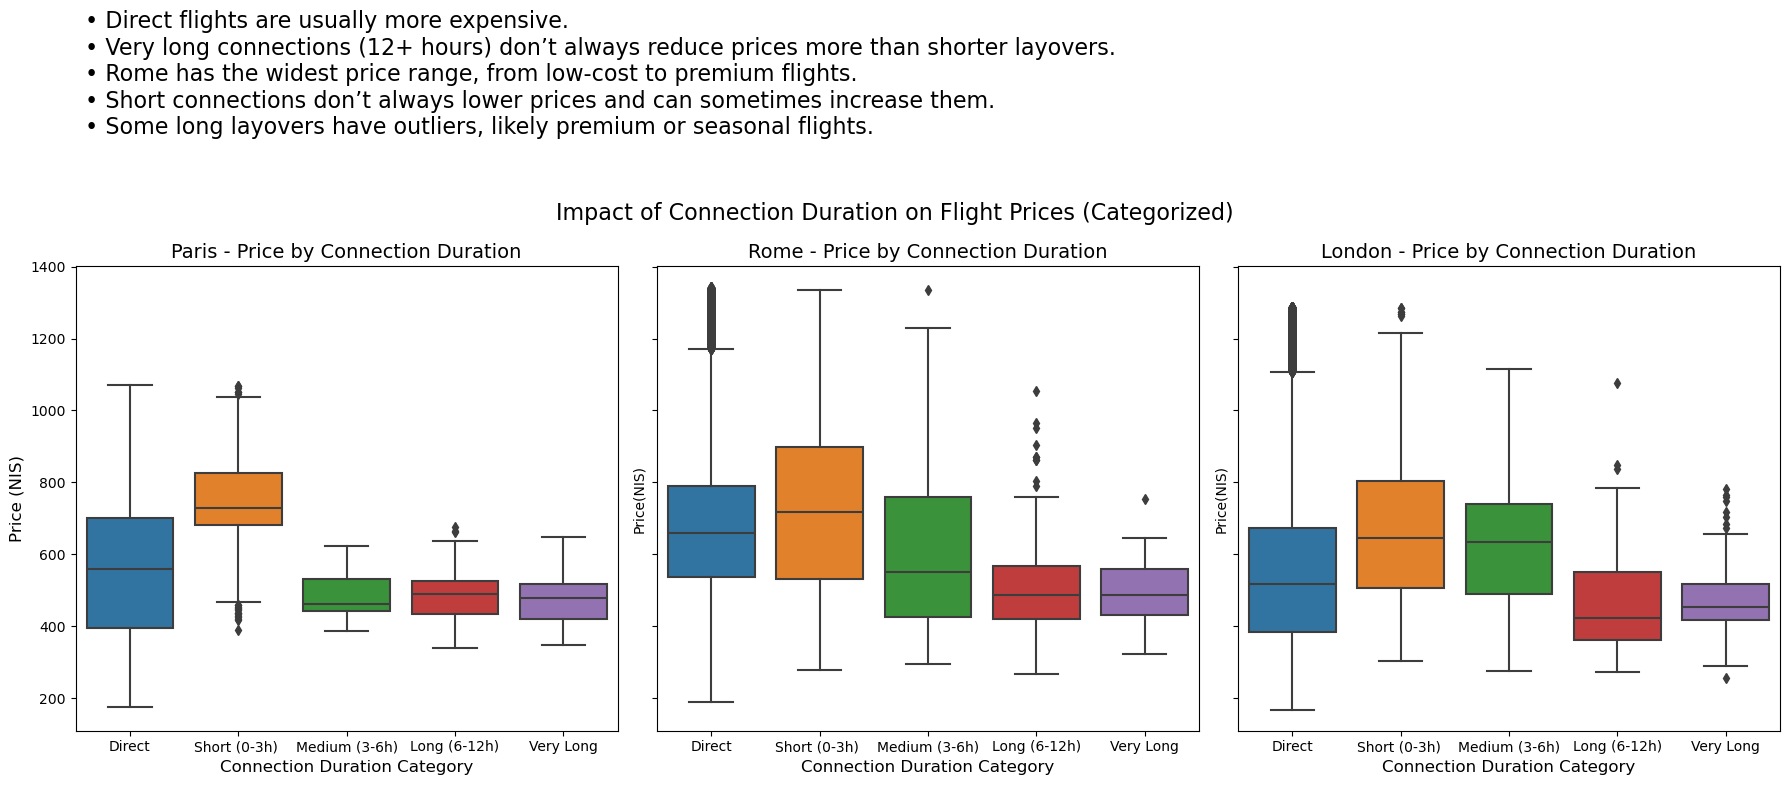

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bins (ranges) for connection duration
bins = [-1, 0, 180, 360, 720, 2000]  # Categories: Direct, Short (0-3h), Medium (3-6h), Long (6-12h), Very Long
labels = ["Direct", "Short (0-3h) ", "Medium (3-6h)", "Long (6-12h)", "Very Long"]

# Create categories for onward and return connections
data_copy["Onward Connection Category"] = pd.cut(data_copy["Onward Connection Duration(min)"], bins=bins, labels=labels)
data_copy["Return Connection Category"] = pd.cut(data_copy["Return Connection Duration(min)"], bins=bins, labels=labels)

# Create subplots for each destination
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
destinations = ["Paris", "Rome", "London"]
colors = ["tab:blue", "tab:orange", "tab:green"]

for i, destination in enumerate(destinations):
    subset = data_copy[data_copy["Destination"] == destination]
    
    # Combine both onward and return connection categories
    subset_melted = pd.melt(subset, id_vars=["Price(NIS)"], 
                             value_vars=["Onward Connection Category", "Return Connection Category"],
                             var_name="Connection Type", value_name="Connection Category")
    
    sns.boxplot(ax=axes[i], data=subset_melted, x="Connection Category", y="Price(NIS)", palette="tab10")
    
    axes[i].set_title(f"{destination} - Price by Connection Duration", fontsize=14)
    axes[i].set_xlabel("Connection Duration Category", fontsize=12)
    if i == 0:
        axes[i].set_ylabel("Price (NIS)", fontsize=12)

# Add a general title
plt.suptitle("Impact of Connection Duration on Flight Prices (Categorized)", fontsize=16)

# Add conclusions above the title
# Adding conclusions above the title
conclusions = (
    "• Direct flights are usually more expensive.\n"
    "• Very long connections (12+ hours) don’t always reduce prices more than shorter layovers.\n"
    "• Rome has the widest price range, from low-cost to premium flights.\n"
    "• Short connections don’t always lower prices and can sometimes increase them.\n"
    "• Some long layovers have outliers, likely premium or seasonal flights."
)

plt.figtext(0.05, 1.3, conclusions, fontsize=16, ha="left", va="top")

plt.tight_layout()
plt.show()


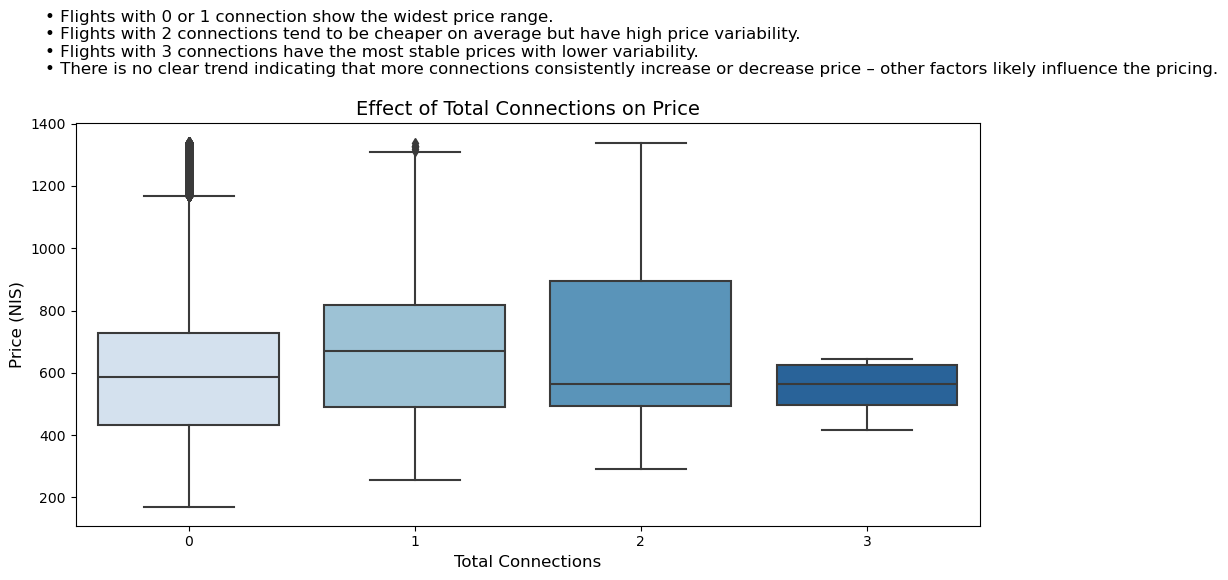

In [315]:
# Create the plot for Total Connections vs Price
plt.figure(figsize=(10, 5))

# Creating a boxplot to show the distribution of prices based on the number of total connections
sns.boxplot(data=data_copy, x='Total Connections', y='Price(NIS)', palette='Blues')

plt.title('Effect of Total Connections on Price', fontsize=14)
plt.xlabel('Total Connections', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Adding conclusions as text above the graph, aligned to the left
conclusions = (
    "• Flights with 0 or 1 connection show the widest price range.\n"
    "• Flights with 2 connections tend to be cheaper on average but have high price variability.\n"
    "• Flights with 3 connections have the most stable prices with lower variability.\n"
    "• There is no clear trend indicating that more connections consistently increase or decrease price – other factors likely influence the pricing."
)

plt.figtext(0.05, 1.15, conclusions, ha="left", va="top", fontsize=12, color="black")

plt.tight_layout()
plt.show()

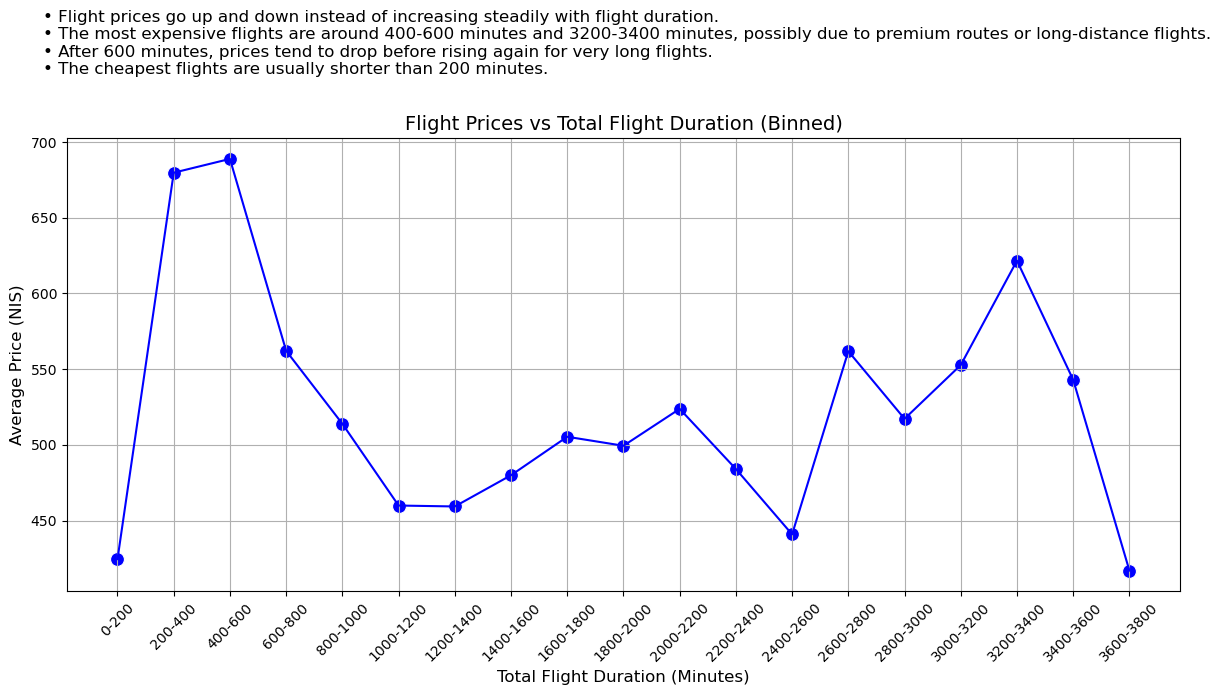

In [316]:
# Create flight duration bins (fixed interval of 100 minutes)
bins = np.arange(0, data_copy['Total Flight Duration(min)'].max() + 200, 200)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
data_copy['Flight Duration Binned'] = pd.cut(data_copy['Total Flight Duration(min)'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average price for each flight duration bin
avg_price_per_duration = data_copy.groupby('Flight Duration Binned')['Price(NIS)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=avg_price_per_duration, x='Flight Duration Binned', y='Price(NIS)', color='blue', s=100)
plt.plot(avg_price_per_duration['Flight Duration Binned'], avg_price_per_duration['Price(NIS)'], linestyle='-', color='blue')


plt.title("Flight Prices vs Total Flight Duration (Binned)", fontsize=14)
plt.xlabel("Total Flight Duration (Minutes)", fontsize=12)
plt.ylabel("Average Price (NIS)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Add conclusions above the title
conclusions = (
    "• Flight prices go up and down instead of increasing steadily with flight duration.\n"
    "• The most expensive flights are around 400-600 minutes and 3200-3400 minutes, possibly due to premium routes or long-distance flights.\n"
    "• After 600 minutes, prices tend to drop before rising again for very long flights.\n"
    "• The cheapest flights are usually shorter than 200 minutes."
)

# Adjusts the figure to make space for the text
plt.subplots_adjust(top=0.85)  # Adjusts the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()



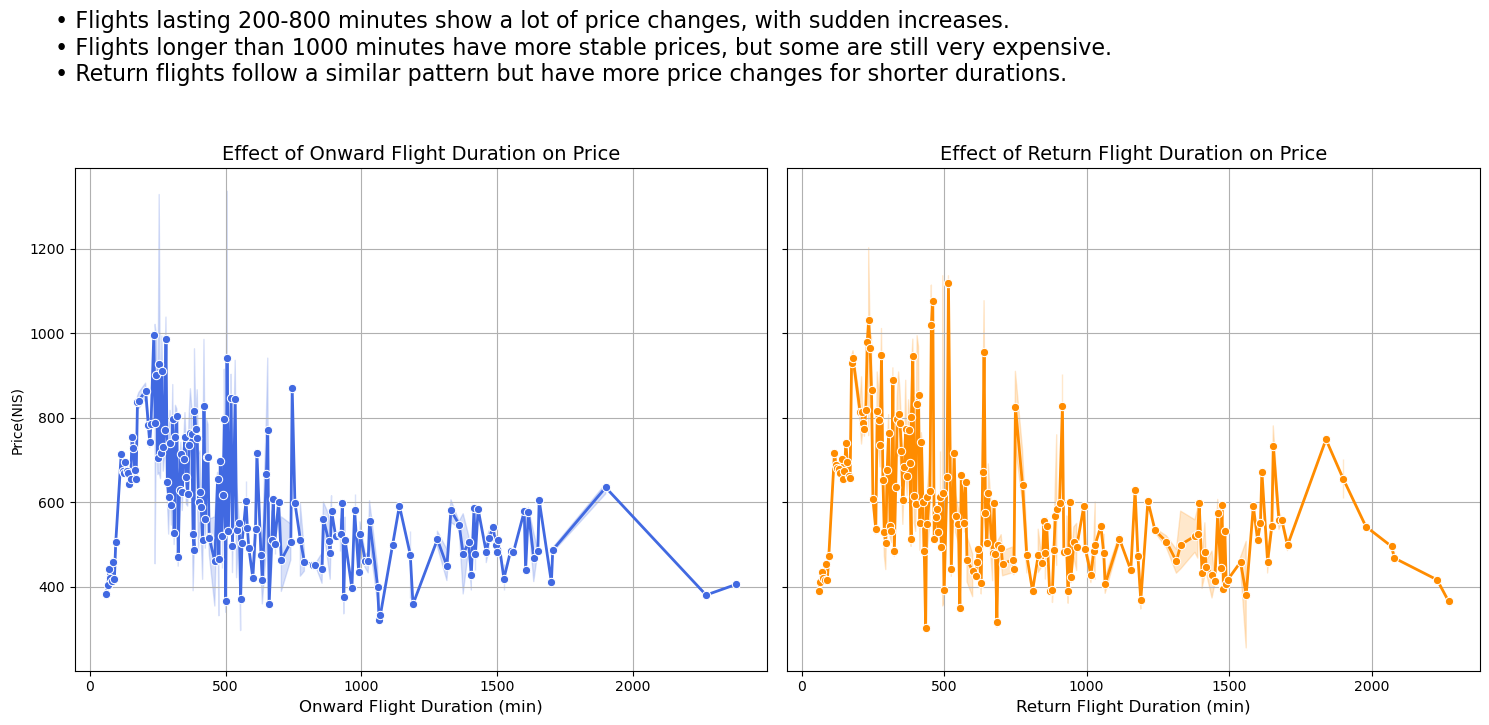

In [317]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
color_onward = "royalblue"
color_return = "darkorange"

# Plot for onward flight duration
sns.lineplot(data=data_copy, x='Total Onward Flight Duration(min)', y='Price(NIS)', 
             marker="o", markersize=6, linewidth=2, color=color_onward, ax=axes[0])
axes[0].set_xlabel("Onward Flight Duration (min)", fontsize=12)
axes[0].set_title("Effect of Onward Flight Duration on Price", fontsize=14)
axes[0].grid(True)

# Plot for return flight duration
sns.lineplot(data=data_copy, x='Total Return Flight Duration(min)', y='Price(NIS)', 
             marker="o", markersize=6, linewidth=2, color=color_return, ax=axes[1])
axes[1].set_xlabel("Return Flight Duration (min)", fontsize=12)
axes[1].set_title("Effect of Return Flight Duration on Price", fontsize=14)
axes[1].grid(True)


fig.subplots_adjust(left=0.1, right=0.95, wspace=0.3)

# Add conclusions above the title
conclusions = (
    "• Flights lasting 200-800 minutes show a lot of price changes, with sudden increases.\n"
    "• Flights longer than 1000 minutes have more stable prices, but some are still very expensive.\n"
    "• Return flights follow a similar pattern but have more price changes for shorter durations."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.2, conclusions, fontsize=16, ha='left', va='top')

plt.tight_layout()
plt.show()


In [318]:
# Airport lists
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']

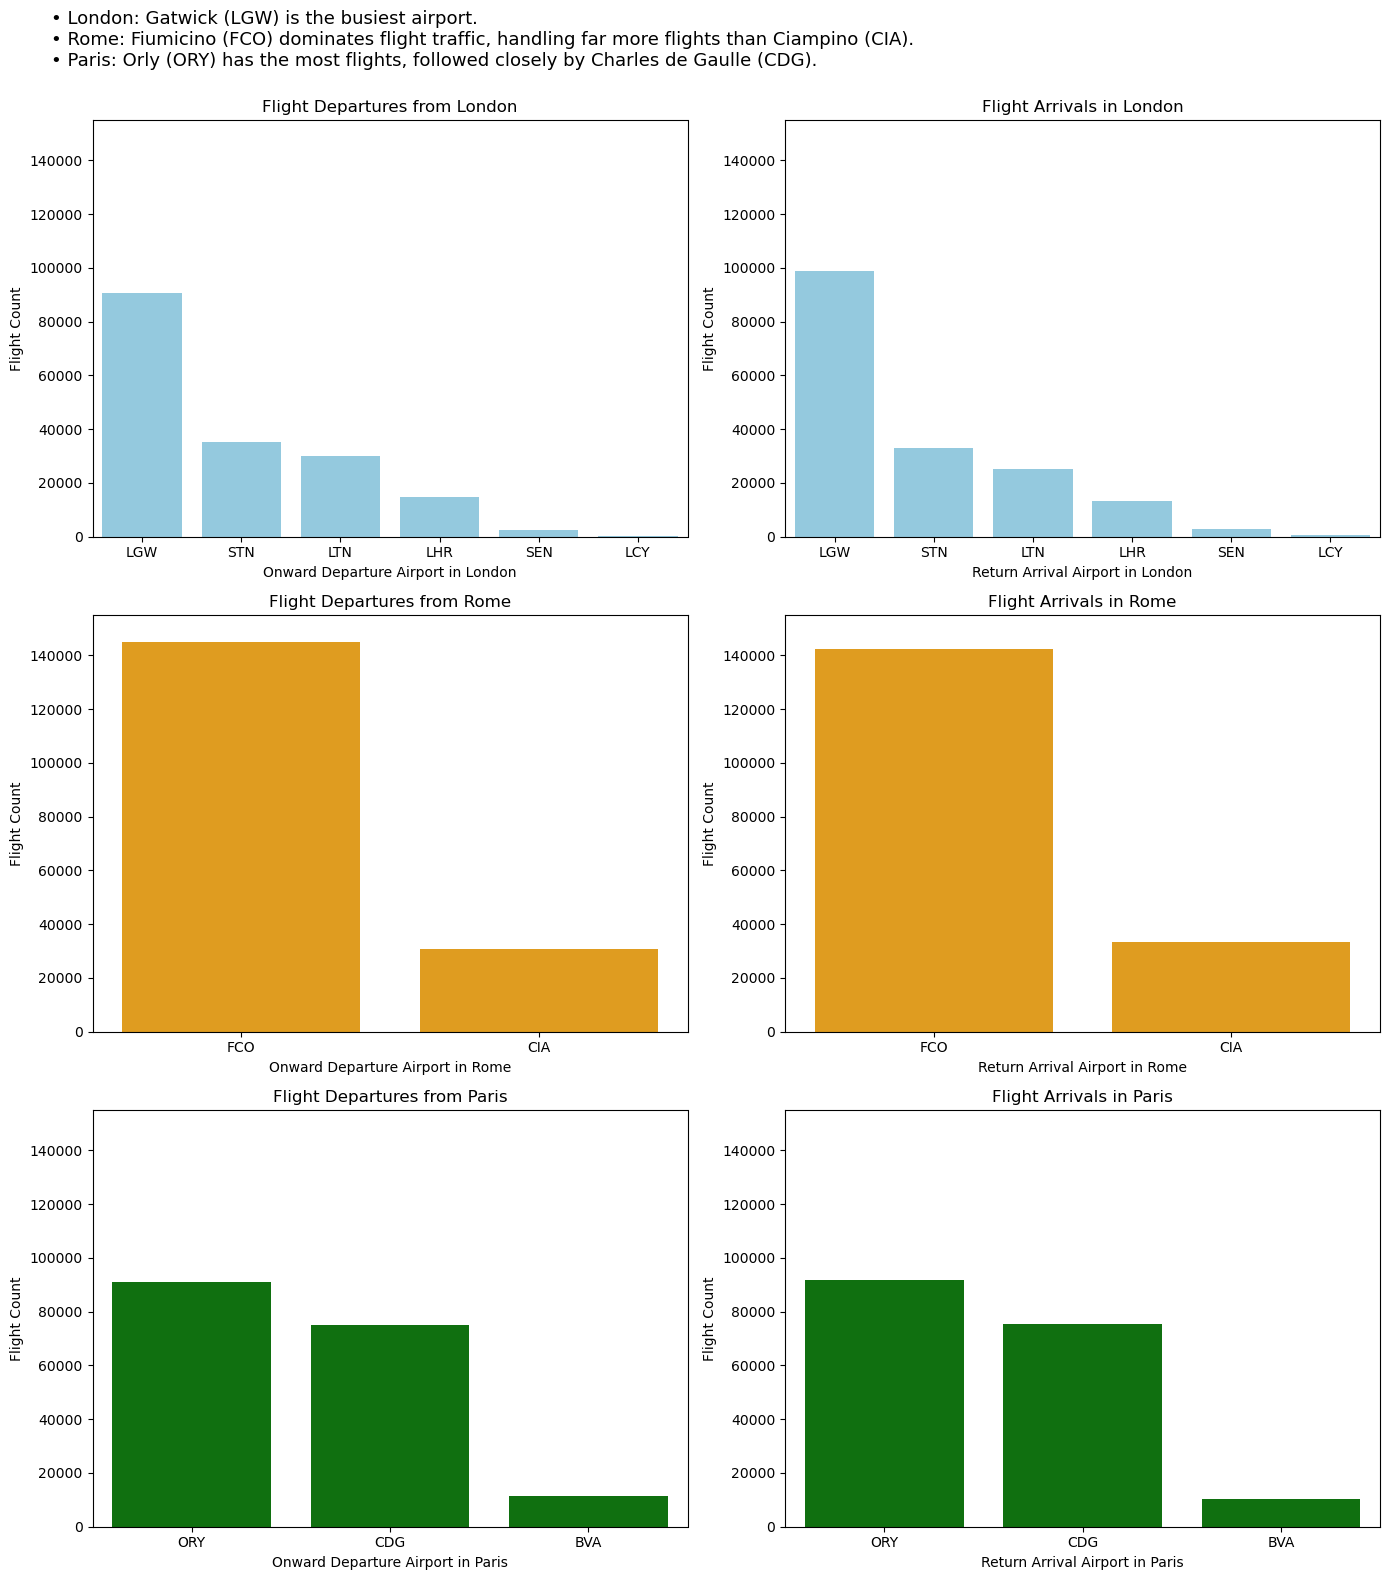

In [319]:
# Create a figure with 6 plots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Function to create a bar plot
def create_bar_plot(data, city, airport_col, title, ax, color):
    # Filter data based on the city and airport column
    subset_data = data_copy[data_copy[airport_col].isin(city)]
    # Count the number of flights for each airport
    flight_counts = subset_data[airport_col].value_counts().reset_index()
    flight_counts.columns = [airport_col, 'Flight Count']
    # Create the bar plot with color
    sns.barplot(data=flight_counts, x=airport_col, y='Flight Count', ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Flight Count")
    return flight_counts['Flight Count'].max() if not flight_counts.empty else 0

# List to store maximum values of flight counts
max_values = []

# Define colors for each city
colors = {
    'London': 'skyblue',
    'Rome': 'orange',
    'Paris': 'green'
}

# Create plots and collect maximum values for the Y-axis
max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0], colors['London']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1], colors['London']))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0], colors['Rome']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1], colors['Rome']))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0], colors['Paris']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1], colors['Paris']))

# Set a unified Y-axis limit for all plots
y_max = max(max_values)
for ax in axes.flatten():
    ax.set_ylim(0, y_max+10000)

# Add conclusions above the title
conclusions = (
    "• London: Gatwick (LGW) is the busiest airport.\n"
    "• Rome: Fiumicino (FCO) dominates flight traffic, handling far more flights than Ciampino (CIA).\n"
    "• Paris: Orly (ORY) has the most flights, followed closely by Charles de Gaulle (CDG)."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.05, conclusions, fontsize=13, ha='left', va='top')

plt.tight_layout()
plt.show()


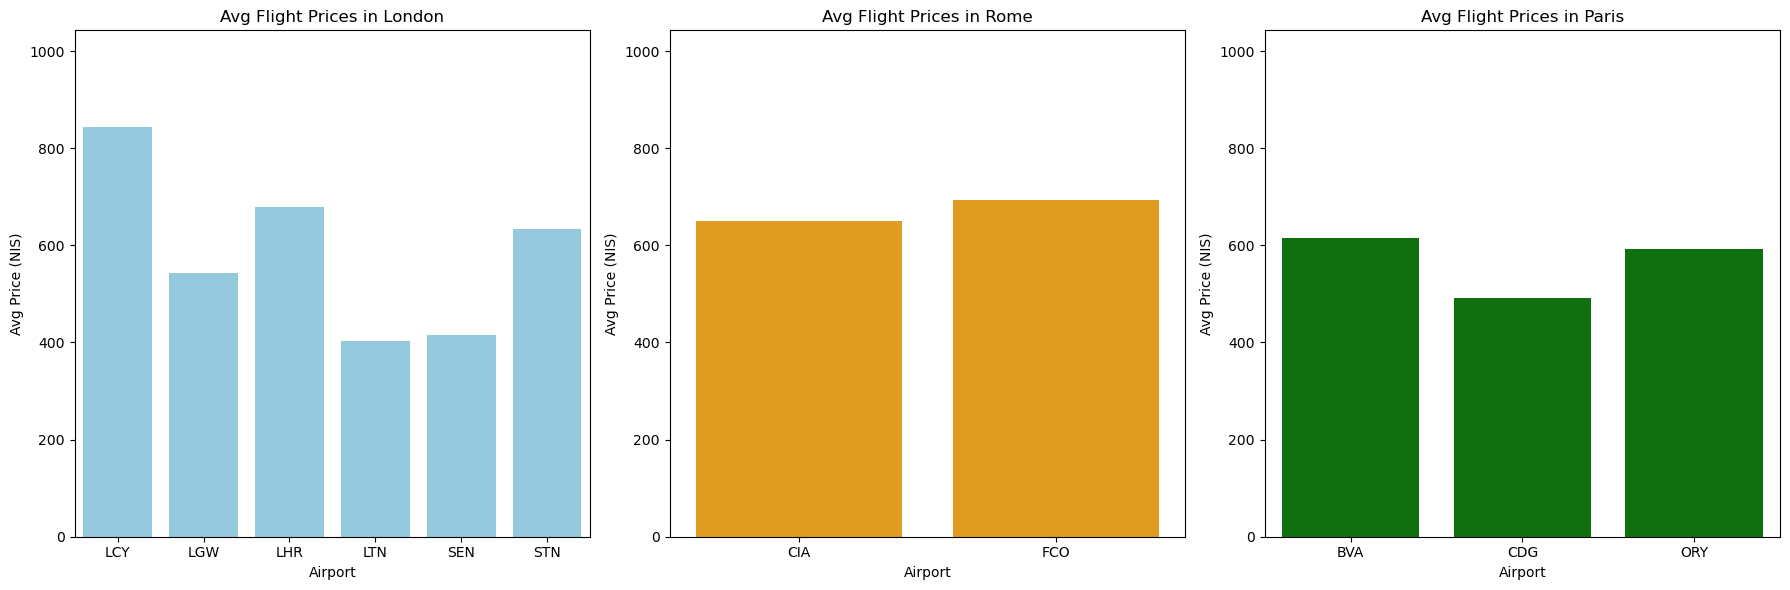

In [320]:
# Use existing airport lists
airport_data = {
    "London": london_airports,
    "Rome": rome_airports,
    "Paris": paris_airports
}

# Set up the figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to create a bar plot for each city
def plot_airport_prices(city, ax, color):
    airports = airport_data[city]  # Use the predefined lists
    subset = data_copy[data_copy["Onward Departure Airport"].isin(airports) | data_copy["Return Arrival Airport"].isin(airports)]

    if subset.empty:
        ax.set_title(f"No Data for {city}")
        ax.set_xticks([])
        return 0

    avg_prices = subset.groupby("Onward Departure Airport")["Price(NIS)"].mean().reset_index()
    sns.barplot(data=avg_prices, x="Onward Departure Airport", y="Price(NIS)", ax=ax, color=color)

    ax.set_title(f"Avg Flight Prices in {city}")
    ax.set_xlabel("Airport")
    ax.set_ylabel("Avg Price (NIS)")
    return avg_prices["Price(NIS)"].max()

# Iterate over cities and plot
colors = ["skyblue", "orange", "green"]
max_prices = [plot_airport_prices(city, ax, colors[i]) for i, (city, ax) in enumerate(zip(airport_data.keys(), axes))]

# Standardize Y-axis
y_max = max(max_prices) if max_prices else 0
for ax in axes:
    ax.set_ylim(0, y_max + 200)

plt.tight_layout()
plt.show()


###  Insights: Flight Prices and Airport Distance

**London**  
- City Airport (LCY) is the closest to the city (11 km) and has the highest prices, probably because it serves business travelers.  
- Gatwick (45 km), Luton (56 km), Stansted (64 km), and Southend (64 km) are farther away but usually cheaper, as they are used by budget airlines.  
- Southampton (SOU, 110 km) is the farthest and not commonly used for international flights.  

**Rome**  
- Fiumicino (FCO, 32 km) and Ciampino (CIA, 15 km) have similar prices, even though they are different distances from the city center.  
- FCO is the main international airport, while CIA is mostly used by low-cost airlines.  

**Paris**  
- Beauvais (BVA, 85 km) is the farthest but still has high prices, probably because of fewer transport options.  
- Charles de Gaulle (CDG, 25 km) is the biggest airport and offers the lowest prices because of strong competition.  
- Orly (ORY, 13 km) is closer but often more expensive than CDG, likely because of high demand and easy access.  

### 🔎 Conclusion  
- Being farther from the city does not always mean cheaper flights. Airports used by low-cost airlines tend to have lower prices, while smaller airports with fewer flights can be more expensive due to less competition.  
____________________________


In [321]:
# Selecting only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Printing correlation of all numeric variables with flight price
print("Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Carry-ons                            0.198557
Departure Month                      0.081097
Checked Bags                         0.039901
Total Connections                    0.038113
Onward Flight Connections            0.027944
Return Flight Connections            0.027640
Return Month                         0.015533
Departure Weekday                   -0.000305
Onward Connection Duration(min)     -0.001828
Return Connection Duration(min)     -0.002180
LOS                                 -0.004541
Departure Time Category Num         -0.018463
Return Time Category Num            -0.042170
Return Weekday                      -0.042786
Return Departure Airport Distance   -0.061253
TTT                                 -0.062268
Return Arrival Airport D

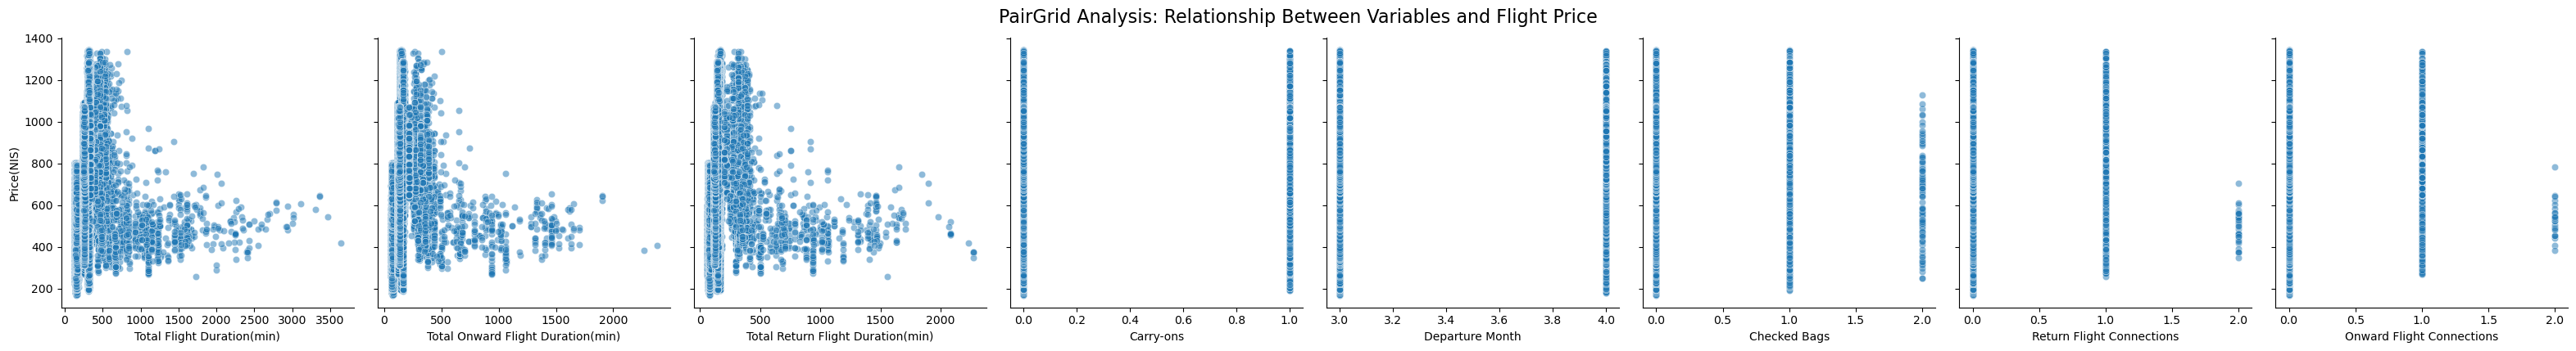

In [322]:
# Select top 6 correlated columns
top_6_columns = ['Total Flight Duration(min)', 'Total Onward Flight Duration(min)', 
                    'Total Return Flight Duration(min)', 'Carry-ons', 'Departure Month', 
                 'Checked Bags', 'Return Flight Connections', 'Onward Flight Connections']

subset_data = data_copy[['Price(NIS)'] + top_6_columns]

# Create PairGrid
g = sns.PairGrid(subset_data, y_vars=["Price(NIS)"], x_vars=top_6_columns, height=4)

# Scatter plot
g.map(sns.scatterplot, alpha=0.5)

# Add title
plt.suptitle("PairGrid Analysis: Relationship Between Variables and Flight Price", fontsize=16, y=1.05)

plt.show()

### Why the PairGrid Plots Look Like This

- **Limited Number of Unique Values**  
  Some numerical features (*e.g., Checked Bags, Return Flight Connections, Onward Flight Connections*) have only a small set of possible values (e.g., 0, 1, 2, 3). This results in data points clustering into distinct vertical bands rather than spreading out continuously.  

- **Discrete Numeric Values Resembling Categorical Data**  
  Even though these variables are numeric, their limited number of unique values causes them to behave similarly to categorical variables in the scatter plots. The regression lines (red dashed lines) appear flat or step-like because price differences between these discrete values are minimal.  

- **Total Flight Duration Shows a More Continuous Pattern**  
  Unlike the other features, *Total Flight Duration(min)* has a broad range of values, allowing for a smoother scatterplot with a more visible trend.  

- **Implications for Data Interpretation**  
  Variables with only a few possible values may still impact price but are harder to analyze using scatter plots. Instead, they may be better represented with box plots or bar charts to compare distributions.  


______________________________________
## **Exploratory Data Analysis (EDA) - the impact of different features on flight price**

In this section, we visualize the impact of different features on flight price.  
We will explore how various factors influence the pricing patterns, helping us understand the key drivers behind the price prediction.


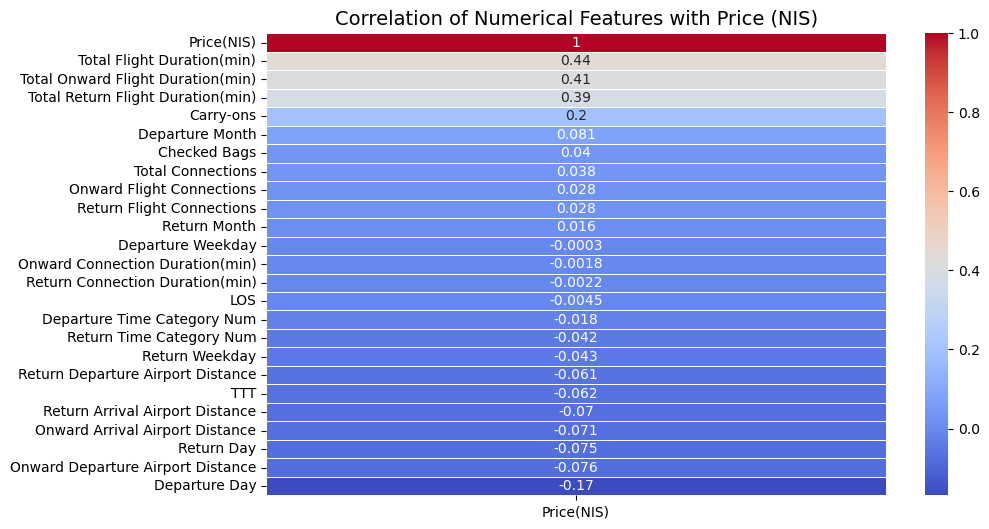

In [323]:
# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Price (NIS)", fontsize=14)
plt.show()


### Conclusions from Correlation Analysis:

- **Total Flight Duration** and its components (**Total Onward Flight Duration** and **Total Return Flight Duration**) have the highest positive correlation with flight price, indicating that longer flights tend to be more expensive.  
- **Carry-ons** show a moderate positive correlation, meaning flights that allow more carry-ons tend to be pricier.  
- **Departure Month** has a weak positive correlation, suggesting a slight seasonal impact on prices.  
- **Checked Bags** and **Total Connections** have very low positive correlations, indicating minimal influence on flight price.  
- **Departure Day** has the strongest negative correlation, implying that certain departure days are consistently associated with lower prices.  
- **Airport distances** (Return/Onward Departure and Arrival) show slight negative correlations, suggesting that flights departing from farther airports are not necessarily more expensive.  
- **Onward and Return Flight Connections** have near-zero correlation, meaning the number of connections does not significantly impact price.  

#### 🔝 Top 10 Features Influencing Flight Price:
1. `Total Flight Duration (min)` - 0.439  
2. `Total Onward Flight Duration (min)` - 0.409  
3. `Total Return Flight Duration (min)` - 0.387  
4. `Carry-ons` - 0.199  
5. `Departure Month` - 0.081  
6. `Checked Bags` - 0.040  
7. `Total Connections` - 0.038  
8. `Onward Flight Connections` - 0.028  
9. `Return Flight Connections` - 0.028  
10. `Return Month` - 0.016  
______________________


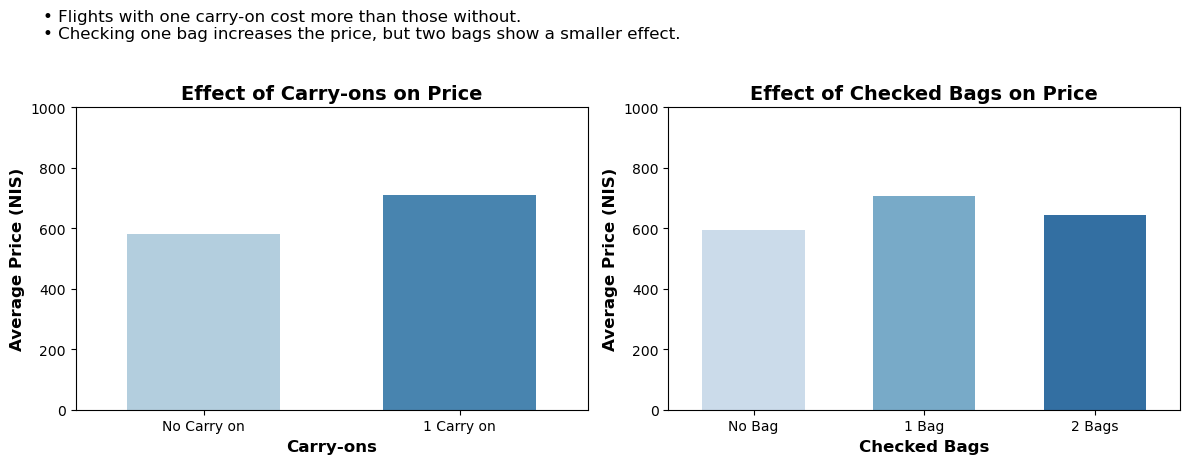

In [324]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

palette_carryons = sns.color_palette("Blues", n_colors=2)
palette_checkedbags = sns.color_palette("Blues", n_colors=3)

# Plot for Carry-ons
sns.barplot(data=data_copy, x='Carry-ons', y='Price(NIS)', ax=axes[0], palette=palette_carryons, width=0.6, ci=None)
axes[0].set_title("Effect of Carry-ons on Price", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Carry-ons", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Average Price (NIS)", fontsize=12, fontweight="bold")
axes[0].set_xticklabels(["No Carry on", "1 Carry on"])

# Plot for Checked Bags
sns.barplot(data=data_copy, x='Checked Bags', y='Price(NIS)', ax=axes[1], palette=palette_checkedbags, width=0.6, ci=None)
axes[1].set_title("Effect of Checked Bags on Price", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Checked Bags", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Average Price (NIS)", fontsize=12, fontweight="bold")
axes[1].set_xticklabels(["No Bag", "1 Bag", "2 Bags"])

# Updating the Y-axis scale for both plots to match
axes[0].set_ylim(0, 1000)
axes[1].set_ylim(0, 1000)

# Add conclusions above the title
conclusions = (
    "• Flights with one carry-on cost more than those without.\n"
    "• Checking one bag increases the price, but two bags show a smaller effect."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()


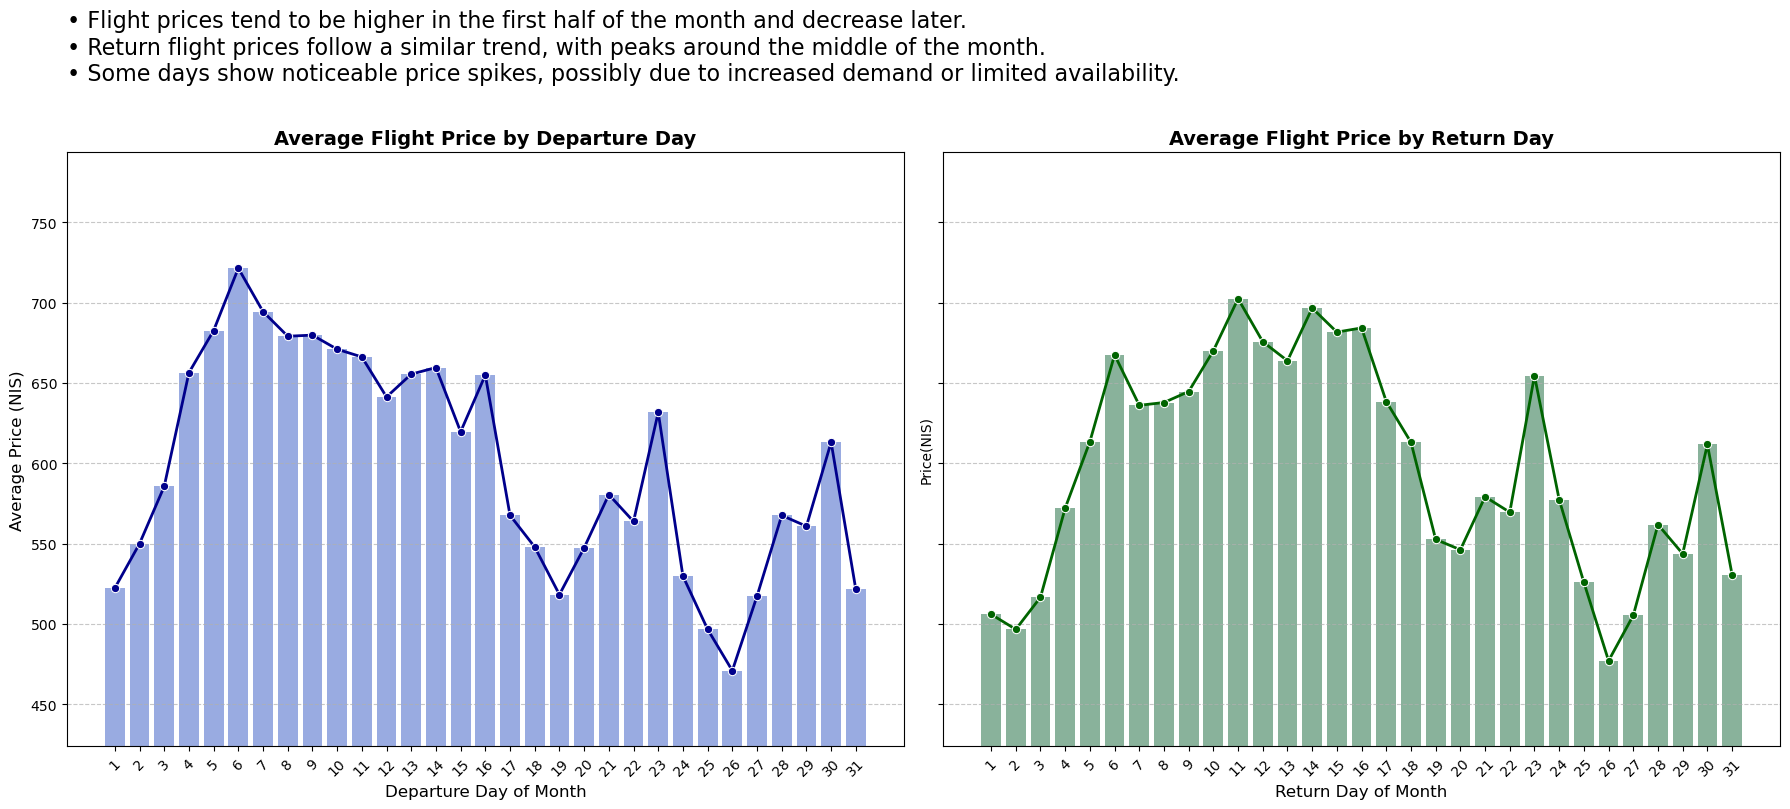

In [325]:
# Calculate average price by Departure Day and Return Day
avg_price_per_departure = data_copy.groupby('Departure Day')['Price(NIS)'].mean().reset_index()
avg_price_per_return = data_copy.groupby('Return Day')['Price(NIS)'].mean().reset_index()

# Creating indices within the DataFrame
avg_price_per_departure["Index"] = range(len(avg_price_per_departure))
avg_price_per_return["Index"] = range(len(avg_price_per_return))

# Create plots with a shared Y-axis
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Setting common Y-axis limits  
y_min = min(avg_price_per_departure['Price(NIS)'].min(), avg_price_per_return['Price(NIS)'].min()) * 0.9
y_max = max(avg_price_per_departure['Price(NIS)'].max(), avg_price_per_return['Price(NIS)'].max()) * 1.1

# Departure Day plot
sns.barplot(ax=axes[0], data=avg_price_per_departure, x="Index", y="Price(NIS)", color="royalblue", alpha=0.6)
sns.lineplot(ax=axes[0], data=avg_price_per_departure, x="Index", y="Price(NIS)", color='darkblue', marker='o', linewidth=2)
axes[0].set_xticks(avg_price_per_departure["Index"])
axes[0].set_xticklabels(avg_price_per_departure["Departure Day"].astype(str), rotation=45)
axes[0].set_xlabel("Departure Day of Month", fontsize=12)
axes[0].set_ylabel("Average Price (NIS)", fontsize=12)
axes[0].set_title("Average Flight Price by Departure Day", fontsize=14, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(y_min, y_max)

# Return Day plot
sns.barplot(ax=axes[1], data=avg_price_per_return, x="Index", y="Price(NIS)", color="seagreen", alpha=0.6)
sns.lineplot(ax=axes[1], data=avg_price_per_return, x="Index", y="Price(NIS)", color='darkgreen', marker='o', linewidth=2)
axes[1].set_xticks(avg_price_per_return["Index"])
axes[1].set_xticklabels(avg_price_per_return["Return Day"].astype(str), rotation=45)
axes[1].set_xlabel("Return Day of Month", fontsize=12)
axes[1].set_title("Average Flight Price by Return Day", fontsize=14, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_ylim(y_min, y_max)

# Add conclusions above the title
conclusions = (
    "• Flight prices tend to be higher in the first half of the month and decrease later.\n"
    "• Return flight prices follow a similar trend, with peaks around the middle of the month.\n"
    "• Some days show noticeable price spikes, possibly due to increased demand or limited availability."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=16, ha='left', va='top')

# Adjusting the layout of the plots
plt.tight_layout()
plt.show()


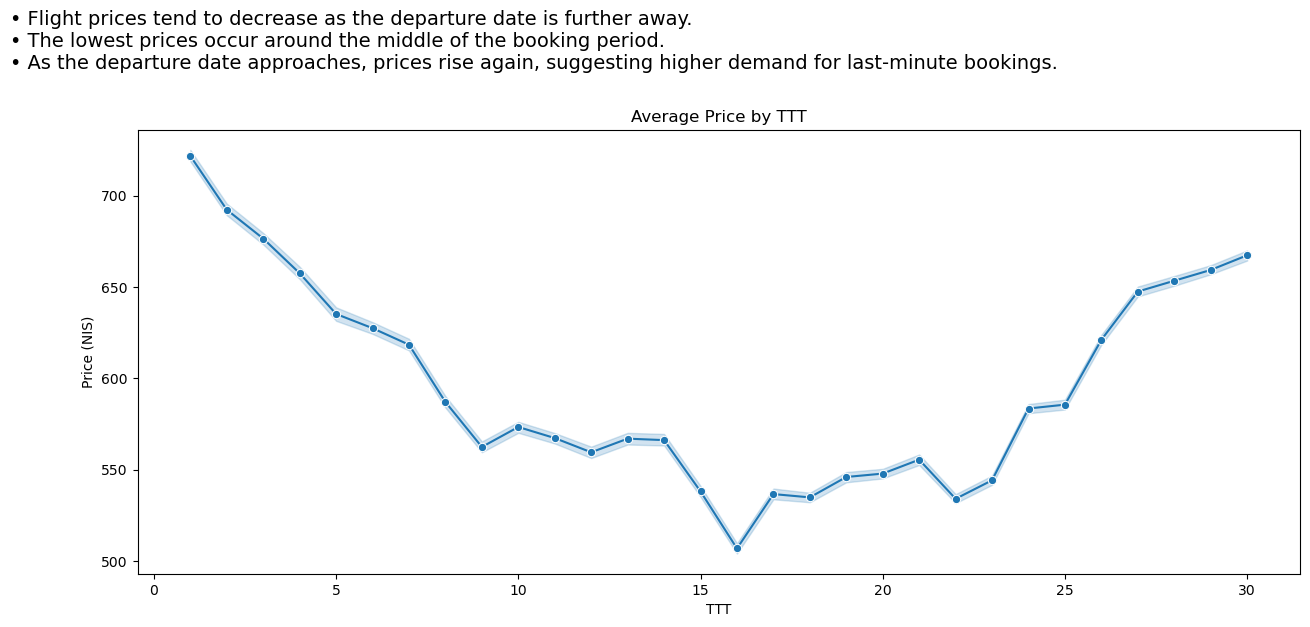

In [326]:
# Create the plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_copy, x='TTT', y='Price(NIS)', marker="o")  # Adding points to the plot
plt.ylabel("Price (NIS)")
plt.xlabel("TTT")
plt.title("Average Price by TTT")

# Adding conclusions above the title
conclusions = (
    "• Flight prices tend to decrease as the departure date is further away.\n"
    "• The lowest prices occur around the middle of the booking period.\n"
    "• As the departure date approaches, prices rise again, suggesting higher demand for last-minute bookings."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.05, conclusions, fontsize=14, ha='left', va='top')

# Display the plot
plt.show()


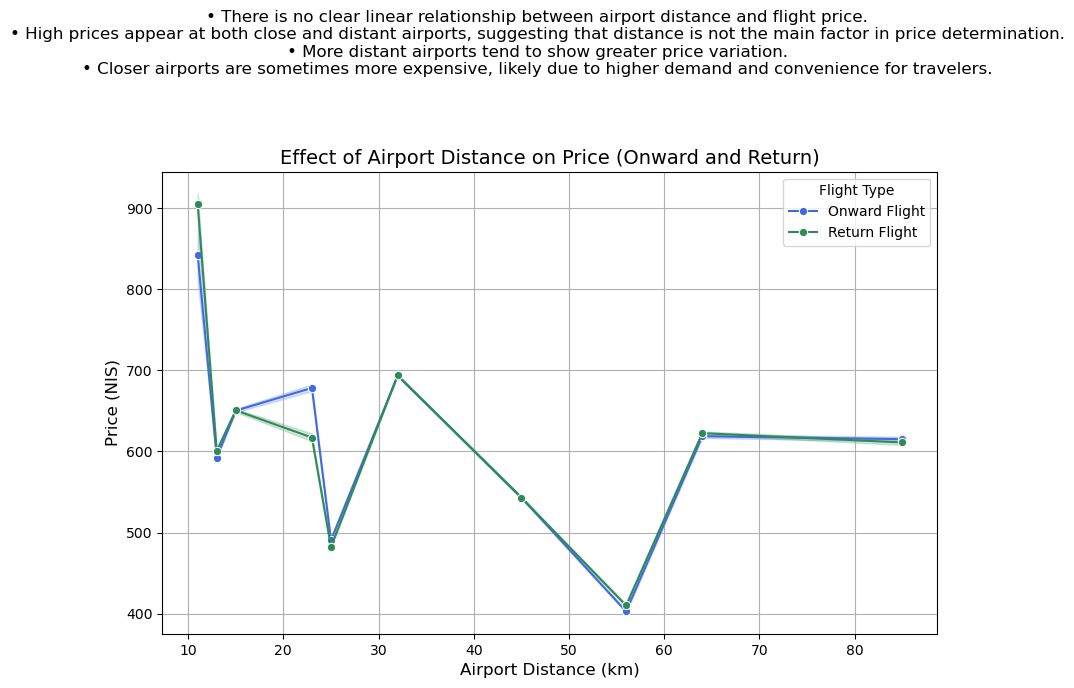

In [327]:
# Line plot for Onward and Return Airport Distance vs Price together
plt.figure(figsize=(10, 6))

# Plot for Onward Departure Airport Distance vs Price
sns.lineplot(data=data_copy, x='Onward Departure Airport Distance', y='Price(NIS)', color='royalblue', marker="o", label="Onward Flight")

# Plot for Return Arrival Airport Distance vs Price
sns.lineplot(data=data_copy, x='Return Arrival Airport Distance', y='Price(NIS)', color='seagreen', marker="o", label="Return Flight")

plt.title("Effect of Airport Distance on Price (Onward and Return)", fontsize=14)
plt.xlabel("Airport Distance (km)", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.legend(title="Flight Type")
plt.grid(True)

# Adding conclusions as text above the graph
conclusions = (
    "• There is no clear linear relationship between airport distance and flight price.\n"
    "• High prices appear at both close and distant airports, suggesting that distance is not the main factor in price determination.\n"
    "• More distant airports tend to show greater price variation.\n"
    "• Closer airports are sometimes more expensive, likely due to higher demand and convenience for travelers."
)

plt.figtext(0.5, 1.15, conclusions, ha="center", va="top", fontsize=12, color="black")

plt.show()


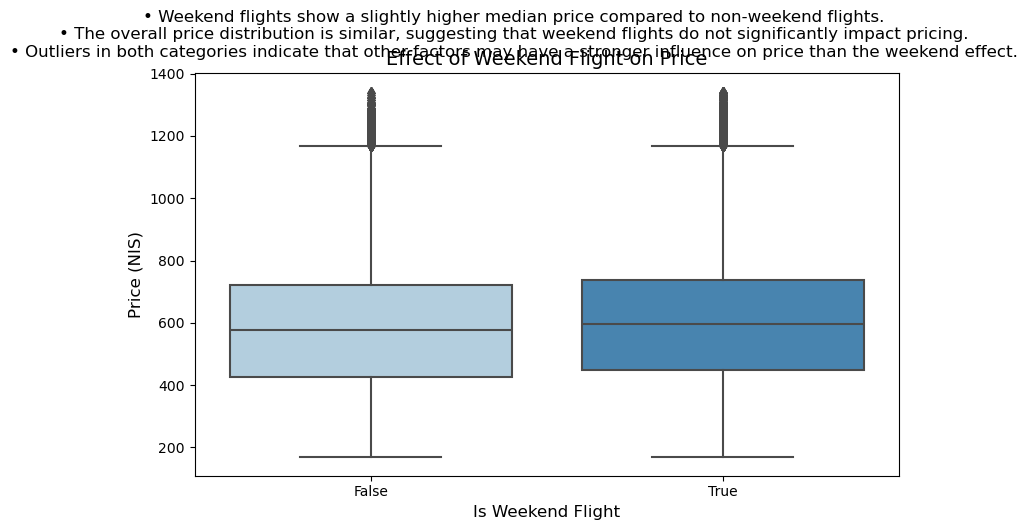

In [328]:
# Create the plot for Is Weekend Flight vs Price
plt.figure(figsize=(8, 5))

# Creating a boxplot to show the distribution of prices based on the weekend status
sns.boxplot(data=data_copy, x='Is Weekend Flight', y='Price(NIS)', palette='Blues')

plt.title('Effect of Weekend Flight on Price', fontsize=14)
plt.xlabel('Is Weekend Flight', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Adding conclusions as text above the graph
conclusions = (
    "• Weekend flights show a slightly higher median price compared to non-weekend flights.\n"
    "• The overall price distribution is similar, suggesting that weekend flights do not significantly impact pricing.\n"
    "• Outliers in both categories indicate that other factors may have a stronger influence on price than the weekend effect."
)

plt.figtext(0.5, 1.05, conclusions, ha="center", va="top", fontsize=12, color="black")

plt.tight_layout()
plt.show()


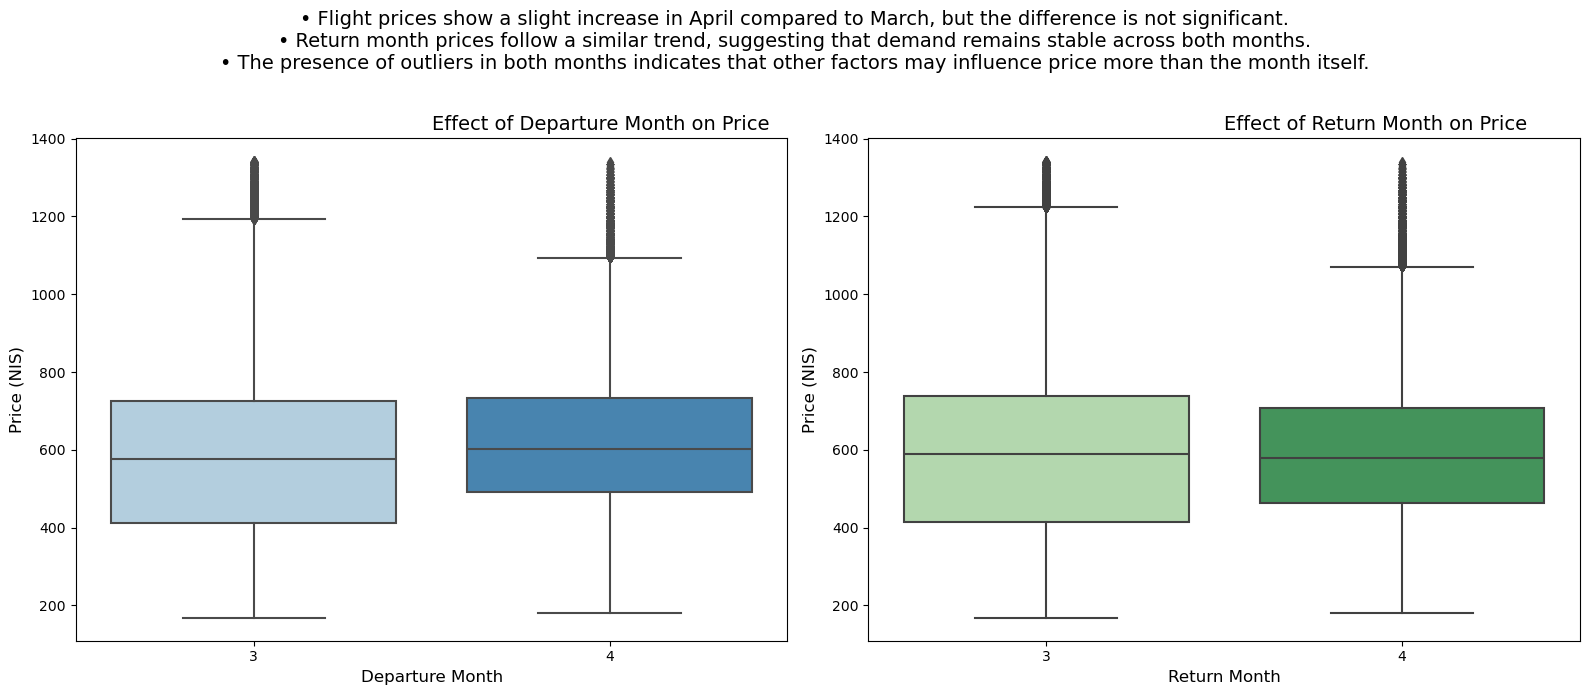

In [329]:
# Create the plot for Departure Month vs Price
plt.figure(figsize=(16, 6))

# Subplot for Departure Month
plt.subplot(1, 2, 1)
sns.boxplot(data=data_copy, x='Departure Month', y='Price(NIS)', palette='Blues')
plt.title('Effect of Departure Month on Price', fontsize=14, ha='left')
plt.xlabel('Departure Month', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Subplot for Return Month
plt.subplot(1, 2, 2)
sns.boxplot(data=data_copy, x='Return Month', y='Price(NIS)', palette='Greens')
plt.title('Effect of Return Month on Price', fontsize=14, ha='left')
plt.xlabel('Return Month', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Adding conclusions as text above the graph
conclusions = (
    "• Flight prices show a slight increase in April compared to March, but the difference is not significant.\n"
    "• Return month prices follow a similar trend, suggesting that demand remains stable across both months.\n"
    "• The presence of outliers in both months indicates that other factors may influence price more than the month itself."
)

plt.figtext(0.5, 1.15, conclusions, ha="center", va="top", fontsize=14, color="black")

# Adjust the layout
plt.tight_layout()
plt.show()

In [330]:
# data_copy.to_csv('clean_data.csv', index=False)

# 📌 Summary of Flight Price Analysis

## ✈️ General Insights
- Flight prices depend on multiple factors: **airport location, number of connections, baggage options, travel season, and booking timing**.
- The analysis was conducted on flights during **March and April**, meaning seasonal demand may have influenced results.
- Some variables have **a clear correlation with price**, while others show **minimal impact**.

## 📊 Key Findings

### 🏙️ Airport and Distance Effects
- Airports **closer to the city center** generally have **higher prices**, likely due to demand from **business travelers**.
- **Budget-friendly airports** located farther from the city tend to offer **cheaper flights**, but **limited transport options** could increase total travel costs.
- **London has the most airports**, providing **more competition and lower average prices**. In contrast, **Rome and Paris** have **fewer options**, leading to higher prices.

### 💼 Baggage and Pricing
- **Adding a carry-on increases ticket prices**, indicating airlines charge extra for hand luggage.
- **Checked baggage does not significantly increase prices**, except in some cases where **one checked bag is more expensive than two**.

### 🔄 Connections and Flight Duration
- **Direct flights are often the most expensive**, while flights with **one or two connections** can be cheaper.
- **Long layovers do not always reduce flight prices**—sometimes shorter layovers are **even more expensive**.
- **Flight duration is moderately correlated with price**, but there are **exceptions based on specific routes and airlines**.

### 🌍 Destination-Specific Observations
- **Most Expensive Destination:** **Rome has the highest price variation**, including both **budget-friendly and premium flights**.
- **Most Affordable Destination:** **London generally has the lowest average prices**, possibly due to **higher airline competition**.
- **Paris shows moderate price variability**, but **certain airports (like BVA) tend to have high prices despite being farther away**.

### ⏳ Time Factors (Seasonality, TTT, and Special Events)
- **Prices fluctuate significantly based on the departure and return days**.
- There are **price peaks and dips within each month**, likely due to **demand surges on specific days**.
- **TTT (Time to Travel)** follows a **U-shaped pattern**: flights booked **far in advance or last-minute tend to be the most expensive**.
- **March-April seasonal effects:** Prices may be higher due to **Easter holidays and spring break**, increasing demand for **European travel**.

### 📈 Observations from PairPlot
- Many features in the dataset have **a limited number of unique values** (e.g., **number of connections: 0, 1, 2, 3**).
- Because of this, in the `PairPlot`, **regression lines were often not visible or meaningful**, as the data points formed **discrete clusters rather than a continuous trend**.
- This suggests that **categorical-like variables (even if numeric) may not be best suited for linear regression models**.

## 🔎 Conclusion
- **Seasonality matters**: Since all flights analyzed were in **March and April**, demand fluctuations due to **holidays and tourism trends** may have affected pricing.
- **Airport selection is crucial**: Flights from **farther, less central airports may be cheaper**, but **transportation costs need to be considered**.
- **Flexible booking strategies**: Adjusting **departure dates, baggage choices, and connections** can **help reduce flight expenses**.
- **Further analysis needed**: Expanding the study to **different months and seasons** could provide **a broader perspective** on long-term pricing trends.

By understanding these insights, travelers can **optimize their flight choices**, and airlines can **strategically adjust pricing** to match demand patterns. 🚀
